<a href="https://colab.research.google.com/github/ToniYenC11/EmergingTech/blob/main/FINAL_PROEJCT_TEECE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction

This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record
captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—
and relates them to academic performance, specifically the final exam score. The dataset is ideal for
educational machine learning applications, enabling learners to perform data preprocessing, visualization,
clustering, regression, and classification.

You are tasked with analyzing how these lifestyle factors affect student performance, and building predictive
models based on insights you derive.

Dataset: [student_habits_performance.csv](https://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EfN9-KVzM0JMqo7dl7XNWO4BnY2EA5M44xa27TcDsnJCpA?e=fCKSz5)

# II. Project Goals
- Determine relationships between lifestyle habits and final exam scores
- Discover meaningful student groupings based on lifestyle through clustering
- Build and evaluate models that predict academic performance
- Summarize and communicate findings through data storytelling

In [ ]:
qimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#Dataset Preprocessing
data = pd.read_excel('/content/student_habits_performance.xlsx')
x # Uncomment to see the before dataset columns info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

None

# Project Components

## 1. Problem Definition
How does the culmination of all good habits and bad habits affect the performance of the students in examination? WHich stands out the most?

### What defines a good habit based from the data?
1. A good habit is defined by activities that are done daily and contributes to a goal set by the individual. For example, having a good diet is a habit that takes discipline.
2. In the case of this study, the following are considered good habits:
  - Good diet quality (`diet_quality`)
  - Daily activity (`exercise_frequency`)
  - Dedication to learning (`attendance_percentage`,`study_hours_per_day`)
  - Good sleep (`sleep_hours`)
  - Excellent Mental health (`mental_health_rating`)
3. On the other hand, being chronically online is a bad habit. Hence the combined `netflix_hours` and `social_media_hours` are both bad habits.

## 2. Data Understanding and Preprocessing

### StandardScaler vs Normalizer
- `StandardScaler` is more approporiate for Regression, PCA, and other algorithms sensitive to **variance**.

- `Normalizer` is more suitable for k-NN and direction-based models.

In [ ]:
# Encoding: Gender, extracurricular_participation, part_time_job as binary encoding
# diet_quality, parental_education_level, internet_quality as One Hot Encoding

data['gender'] = data['gender'].apply(lambda x: 1 if x=='Female' else 0)
data['extracurricular_participation'] = data['extracurricular_participation'].apply(lambda x: 1 if x=='Yes' else 0)
data['part_time_job'] = data['part_time_job'].apply(lambda x: 1 if x=='Yes' else 0)

display("Before encoding:")
for i in ['diet_quality']:
  display(f"Unique values of {i} : {data[i].unique()}")

# One Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_data = onehot_encoder.fit_transform(data[['diet_quality']])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['diet_quality']))
data = pd.concat([data, encoded_df], axis=1)
data.drop(['diet_quality','parental_education_level','internet_quality','part_time_job','extracurricular_participation','gender','diet_quality_Fair','diet_quality_Poor','age'], axis=1, inplace=True)

# New feature: Total_screentime = Number of Netflix Hours + Number of Social Media Hours
data['total_screen_time'] = data['netflix_hours'] + data['social_media_hours']
data = data.drop(['netflix_hours', 'social_media_hours','student_id'], axis=1)

display(data.info())
display(data.head())

'Before encoding:'

"Unique values of diet_quality : ['Fair' 'Good' 'Poor']"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours_per_day    1000 non-null   float64
 1   attendance_percentage  1000 non-null   float64
 2   sleep_hours            1000 non-null   float64
 3   exercise_frequency     1000 non-null   int64  
 4   mental_health_rating   1000 non-null   int64  
 5   exam_score             1000 non-null   float64
 6   diet_quality_Good      1000 non-null   float64
 7   total_screen_time      1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


None

study_hours_per_day  attendance_percentage  sleep_hours  \
0                  0.0                   85.0          8.0   
1                  6.9                   97.3          4.6   
2                  1.4                   94.8          8.0   
3                  1.0                   71.0          9.2   
4                  5.0                   90.9          4.9   

   exercise_frequency  mental_health_rating  exam_score  diet_quality_Good  \
0                   6                     8        56.2                0.0   
1                   6                     8       100.0                1.0   
2                   1                     1        34.3                0.0   
3                   4                     1        26.8                0.0   
4                   3                     1        66.4                0.0   

   total_screen_time  
0                2.3  
1                5.1  
2                4.4  
3                4.9  
4                4.9

## 3. Exploratory Data Analysis

- Visualizations:
  - Histograms for feature distributions
  - Scatter plots and box plots for comparing habits vs. scores
  - Correlation heatmap

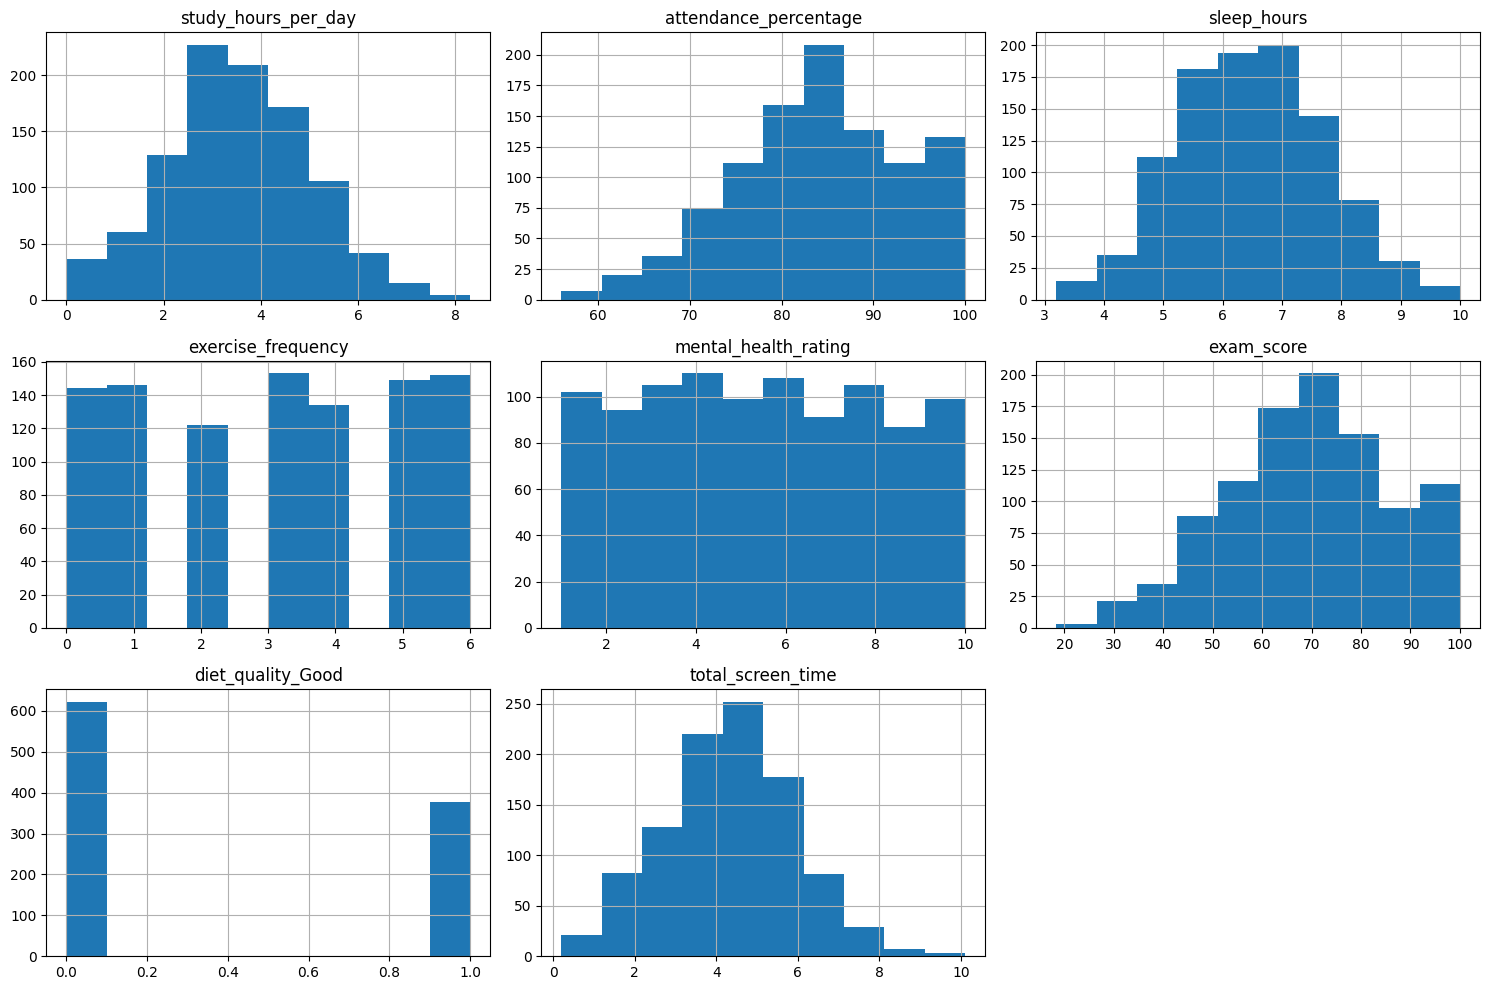

In [ ]:
# Historgrams for feature distributions
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

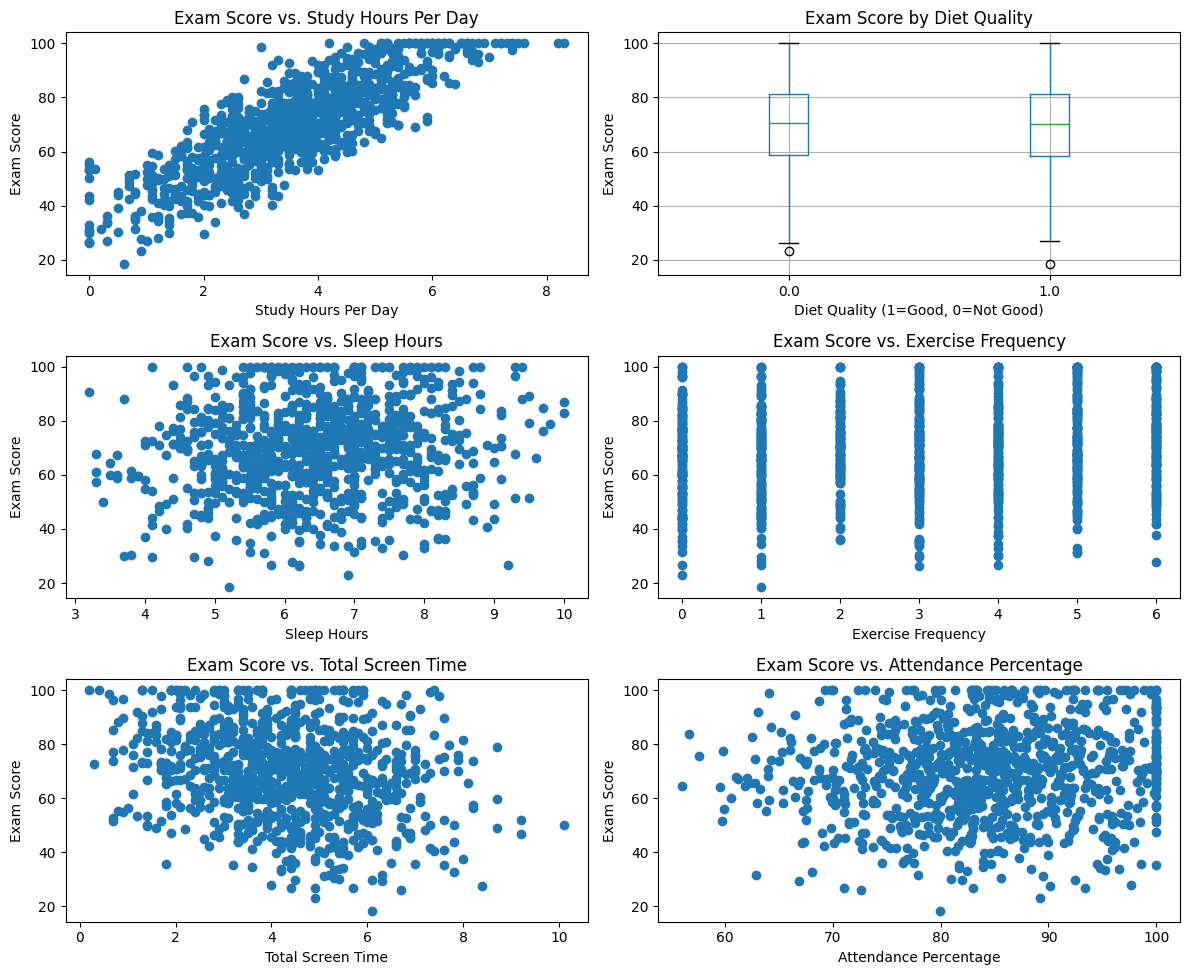

In [ ]:
# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Scatter plot for study_hours_per_day vs. exam_score
axes[0, 0].scatter(data['study_hours_per_day'], data['exam_score'])
axes[0, 0].set_xlabel('Study Hours Per Day')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Exam Score vs. Study Hours Per Day')

# Box plot for diet_quality vs. exam_score
data.boxplot(column='exam_score', by='diet_quality_Good', ax=axes[0, 1])
axes[0, 1].set_xlabel('Diet Quality (1=Good, 0=Not Good)')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Exam Score by Diet Quality')
fig.suptitle('') # Suppress the default title

# sleep_hours vs. exam_score:
axes[1, 0].scatter(data['sleep_hours'], data['exam_score'])
axes[1, 0].set_xlabel('Sleep Hours')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Exam Score vs. Sleep Hours')

# exercise_frequency vs. exam_score:
axes[1, 1].scatter(data['exercise_frequency'], data['exam_score'])
axes[1, 1].set_xlabel('Exercise Frequency')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Exam Score vs. Exercise Frequency')

# exercise_frequency vs. exam_score:
axes[2, 0].scatter(data['total_screen_time'], data['exam_score'])
axes[2, 0].set_xlabel('Total Screen Time')
axes[2, 0].set_ylabel('Exam Score')
axes[2, 0].set_title('Exam Score vs. Total Screen Time')

# exercise_frequency vs. exam_score:
axes[2, 1].scatter(data['attendance_percentage'], data['exam_score'])
axes[2, 1].set_xlabel('Attendance Percentage')
axes[2, 1].set_ylabel('Exam Score')
axes[2, 1].set_title('Exam Score vs. Attendance Percentage')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

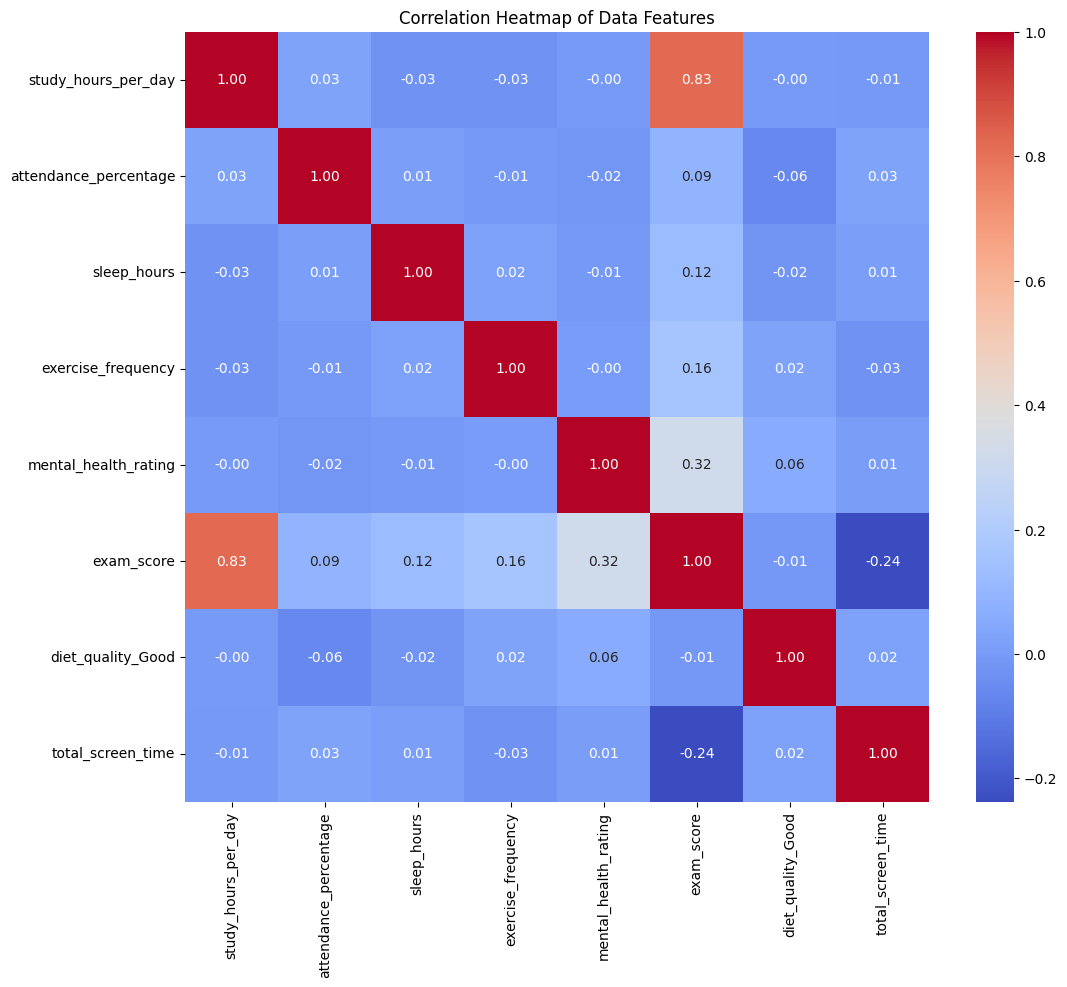

In [ ]:
# Correlation heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Data Features')
plt.show()

### Insights from EDA

The insights here are not necessarily the results of the models, but rather a visualization of the data itself. These are only hypotheses and not yet conclusions.

1. Some features of the dataset can be seen as normally distributed. For example, `total_screen_time` which was the combined `netflix_hours` and `social_media_hours`. Other features include `study_hours_per_day` and `sleep_hours`.

2. Other features are more scewed, but have similar pattern with each other. There was a high positive correlation with `study_hours_per_day` and `exam_score`, showing that studying more would eventually lead to scoring more on exams. Next factor to consider is the `mental_health_rating`, which means being more mentally healthy will lead to improve exam performance.

3. `total_screen_time` appears to negatively impact the exam scores the most out of all factors based from the correlation heatmap.

4. `Sleep_hours` and `Exercise_Frequency` have weak correlation with the exam scores. The `diet_quality` based from the boxplot shows weak correlation with the exams. This is because both quality have almost the same range of data, with an even more negative outlier for the "good" quality diet.

## 4. Clustering

In [ ]:
features = data.drop('exam_score',axis=1).to_numpy()
labels = data['exam_score'].to_numpy()

#Scaling of features
scaler = StandardScaler()

unscaled_features = features
features = scaler.fit_transform(unscaled_features)

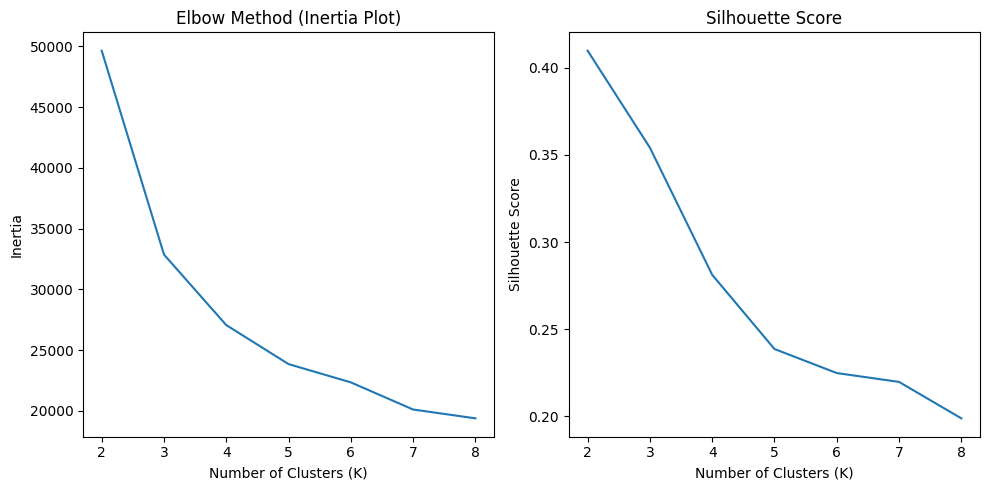

For n_clusters = 2 The average silhouette_score is : 0.1575401808077814
For n_clusters = 3 The average silhouette_score is : 0.11519589585131597
For n_clusters = 4 The average silhouette_score is : 0.10265501973100231
For n_clusters = 5 The average silhouette_score is : 0.09676970366007948
For n_clusters = 6 The average silhouette_score is : 0.11888775235652173
For n_clusters = 7 The average silhouette_score is : 0.11872647478751377
For n_clusters = 8 The average silhouette_score is : 0.1095170833244797


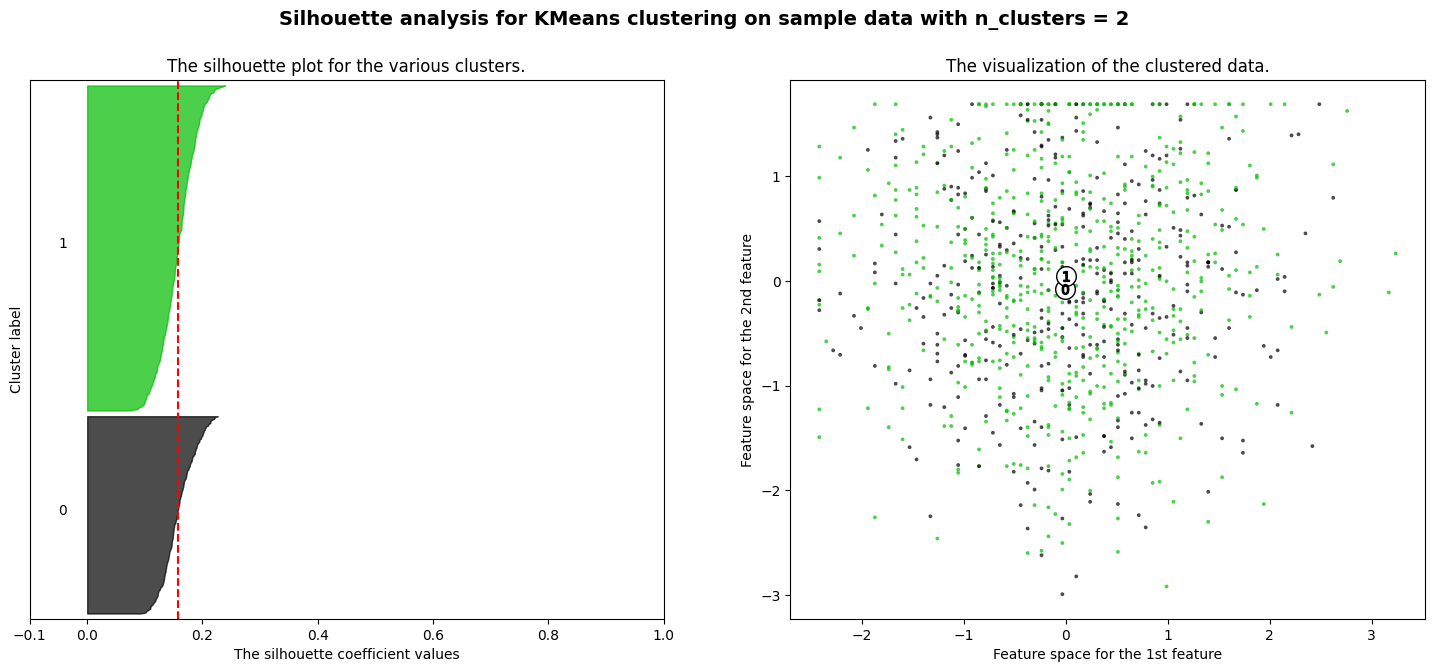

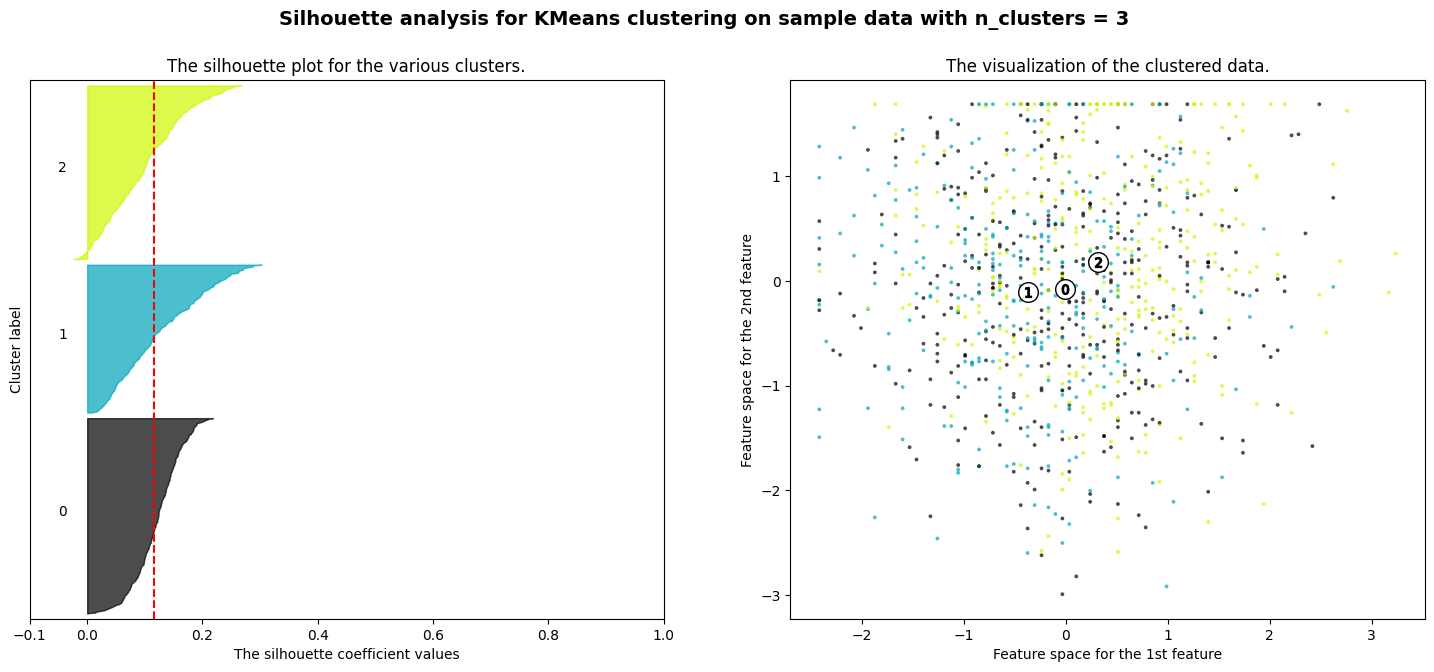

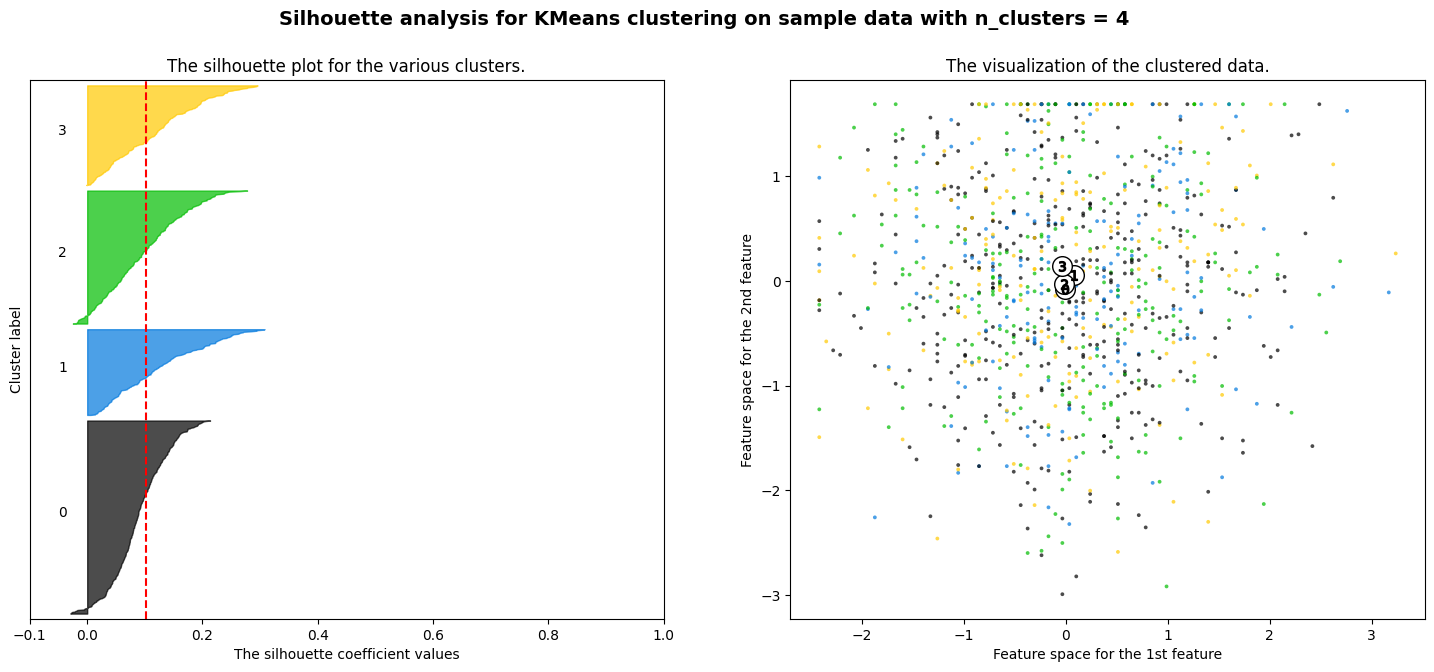

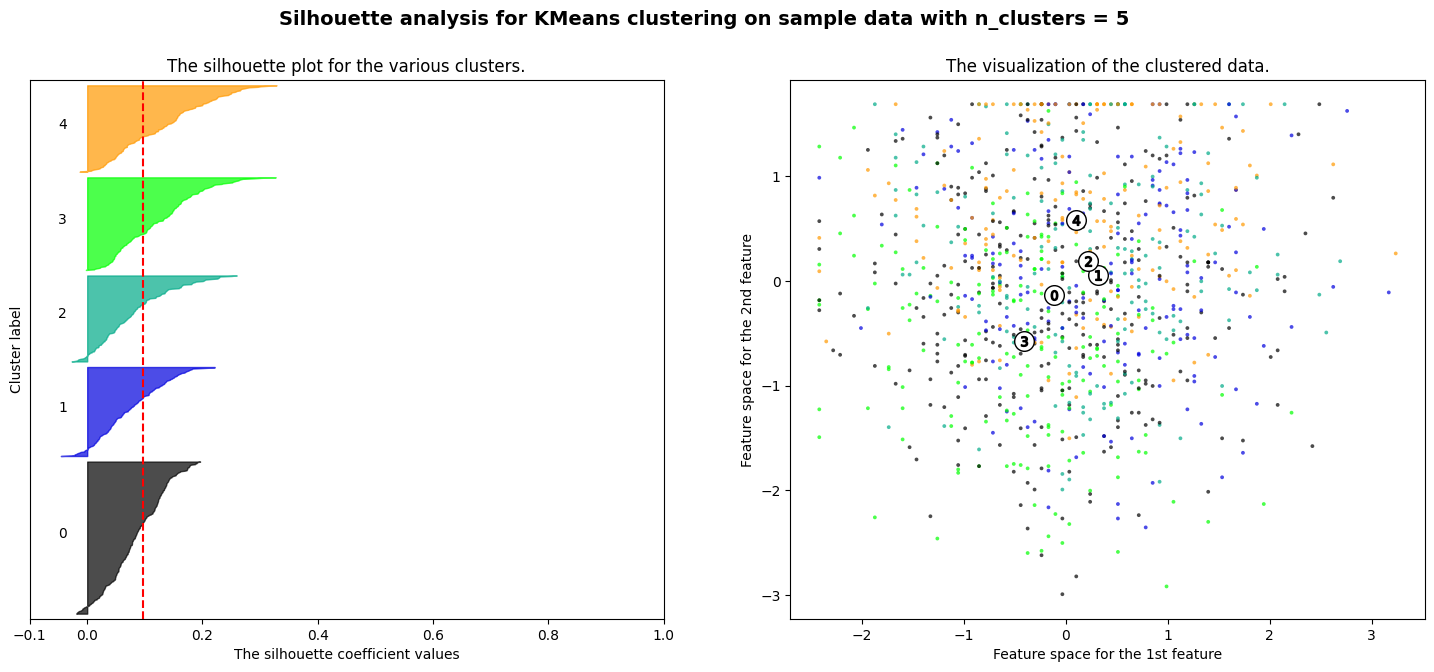

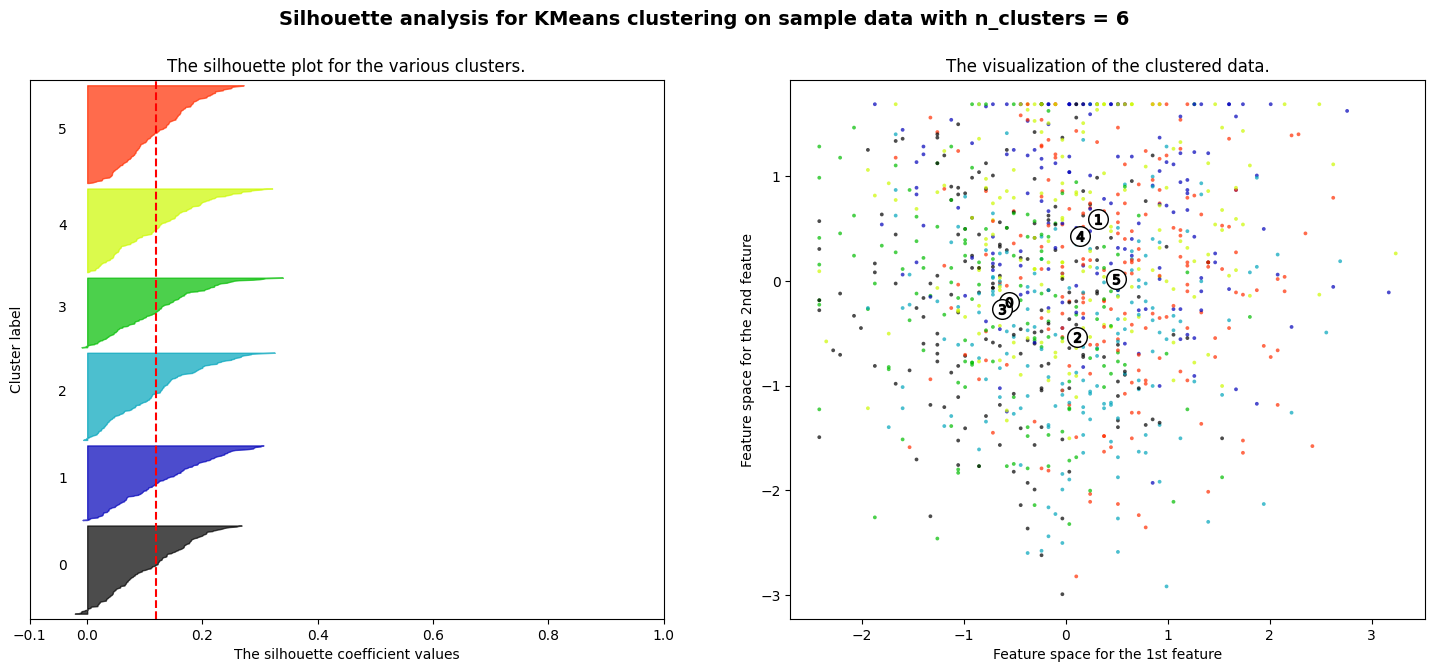

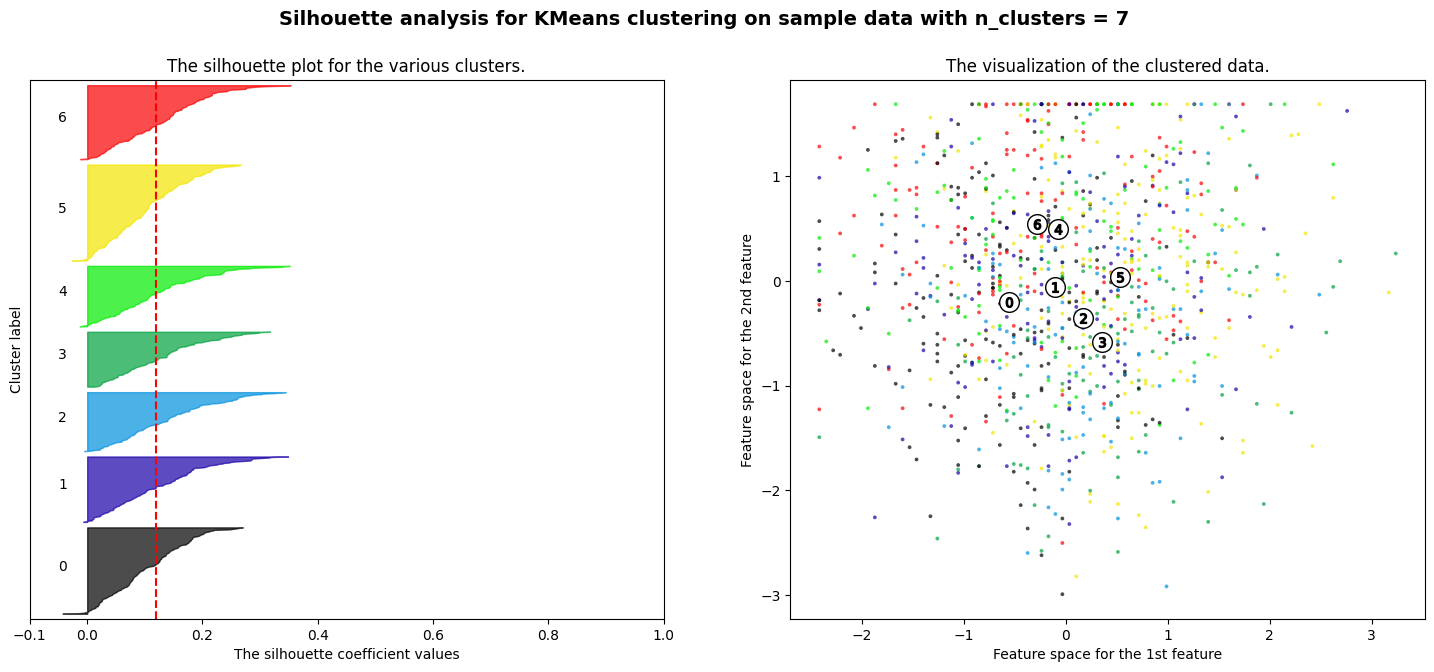

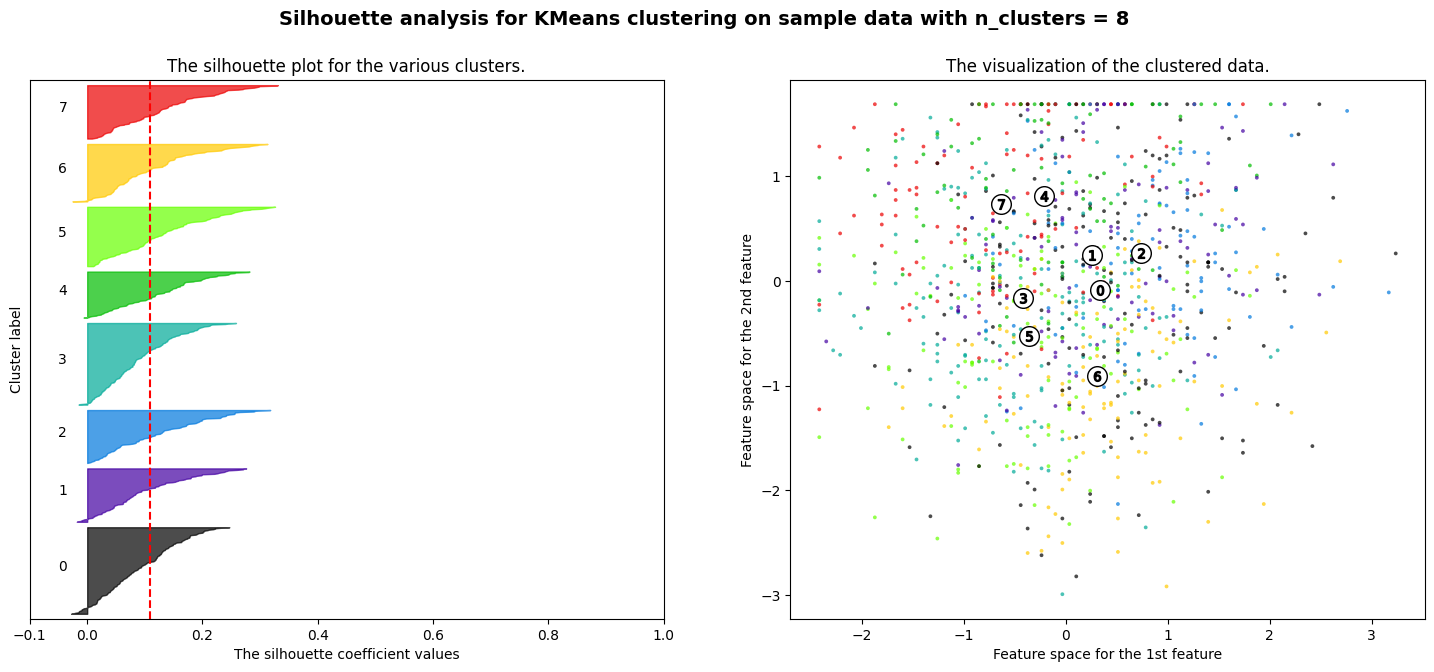

In [ ]:
# Elbow method and Silhouette Score

# Create a KMeans model with a range of K values
K_values = range(2, 9)
inertia_values = []
silhouette_scores = []

# Iterate over the range of K values
for K in K_values:
    # Create a KMeans model with the current K value
    model = KMeans(n_clusters=K)

    # Fit the model to the data and calculate the inertia
    model.fit(unscaled_features)
    inertia = model.inertia_
    inertia_values.append(inertia)

    # Calculate the silhouette score for the current K value
    labels = model.predict(unscaled_features)
    silhouette = silhouette_score(unscaled_features, labels)
    silhouette_scores.append(silhouette)

# Create a plot to visualize the inertia
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_values, inertia_values)
plt.title('Elbow Method (Inertia Plot)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.subplot(1, 2, 2)
plt.plot(K_values, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Separate graph for each clusters and their silhouette scores
for n_clusters in K_values:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        features[:, 0], features[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

- Based from the results of the elbow method, the score starts to see rapid decrease after `k=3`, indicating that this is a useful cluster number.

- This is further supported by the silhouette score plotting, showing that at `k=3`, there is little presence of negative silhoutte values. From `k=4` and above, negative coefficient values start to appear in each clusters.

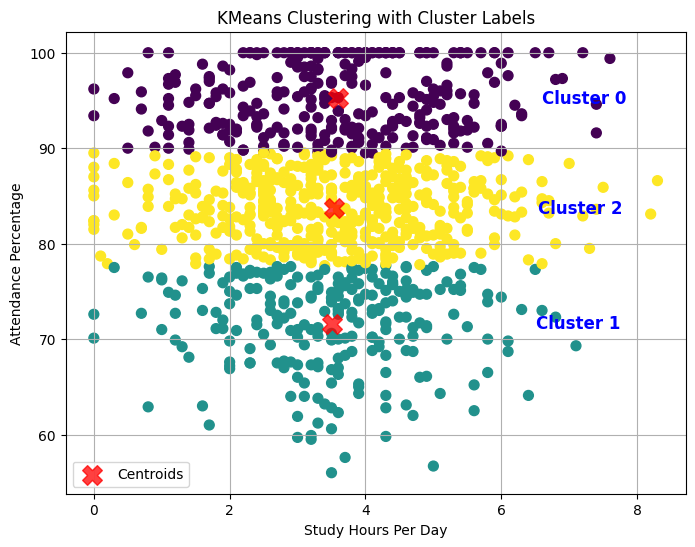

In [ ]:
# Labeling of clusters

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit(unscaled_features)
predict = kmeans.predict(unscaled_features)

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the clustered data (first two features)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(unscaled_features[:, 0], unscaled_features[:, 1], c=predict, cmap='viridis', s=50)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Label each cluster center
for idx, (x, y) in enumerate(centers[:, :2]):
    plt.text(x + 3, y, f'Cluster {idx}', fontsize=12, weight='bold',
             ha='left', va='center', color='blue')  # shifted right and aligned left

plt.title('KMeans Clustering with Cluster Labels')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Attendance Percentage')
plt.legend()
plt.grid(True)
plt.show()

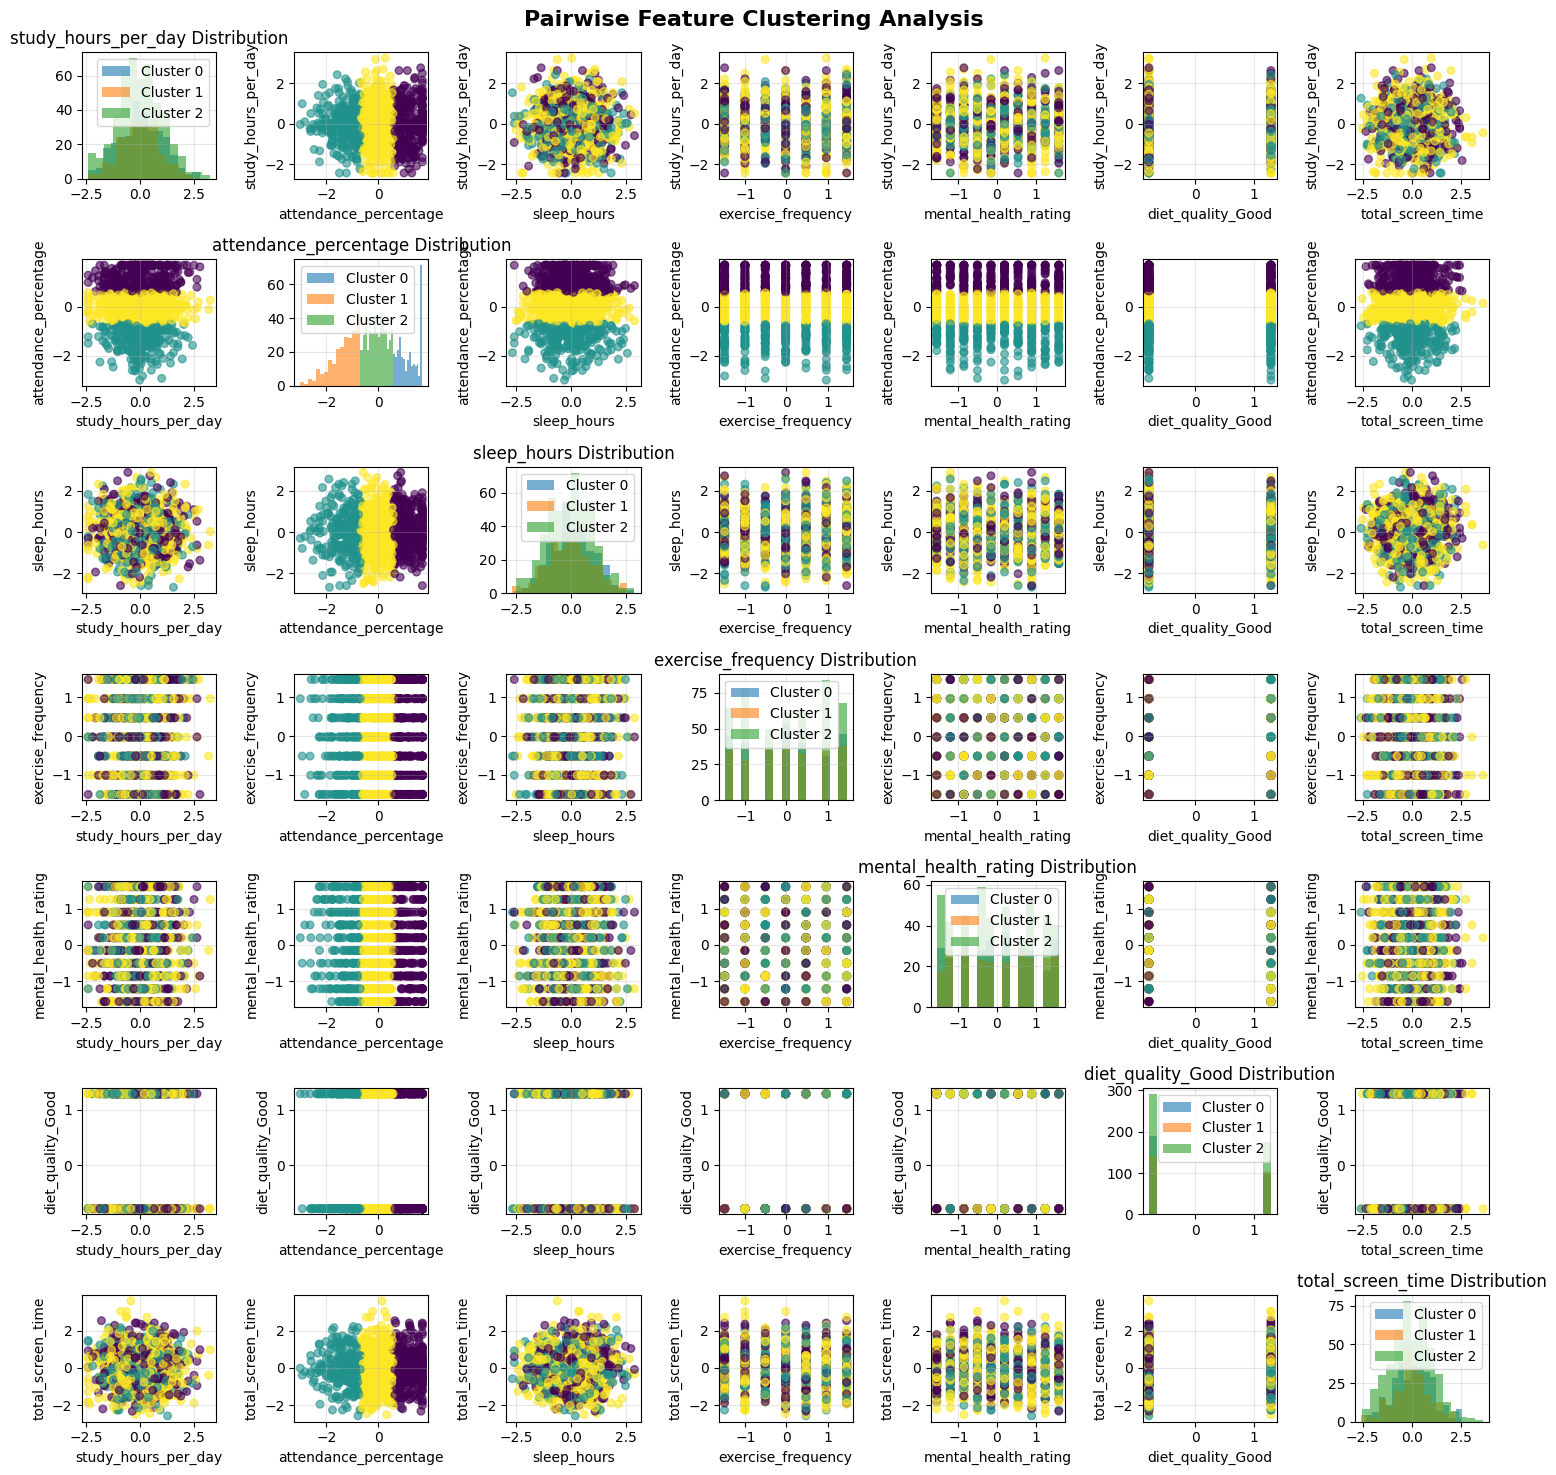

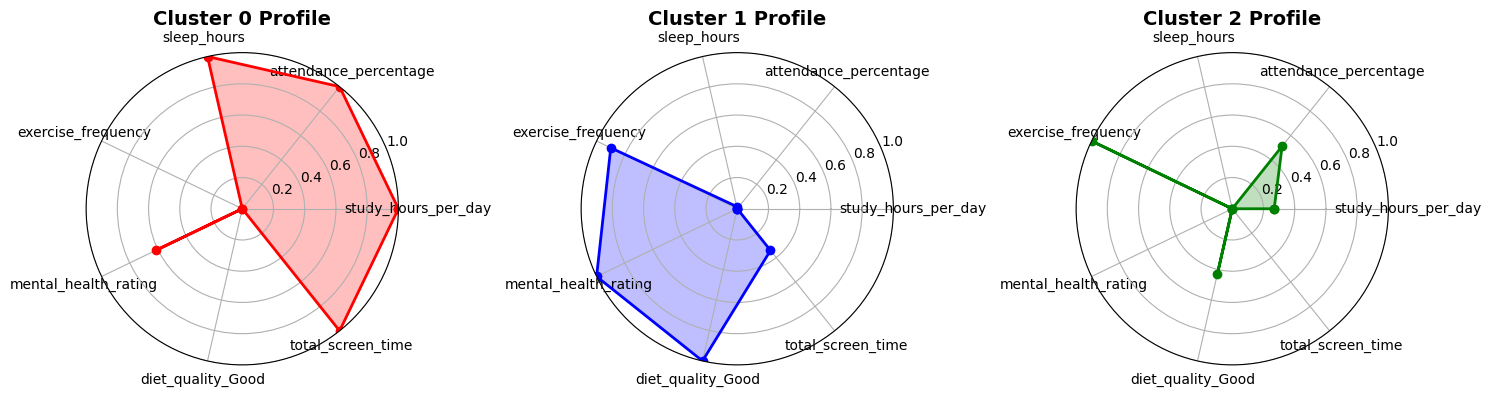

In [ ]:
def plot_pairwise_clustering(features, labels, feature_names=None):
    """Create pairwise scatter plots of all features with cluster coloring"""
    n_features = features.shape[1]

    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(n_features)]

    fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
    fig.suptitle('Pairwise Feature Clustering Analysis', fontsize=16, fontweight='bold')

    for i in range(n_features):
        for j in range(n_features):
            ax = axes[i, j]

            if i == j:
                # Diagonal: show distribution by cluster
                for cluster in np.unique(labels):
                    cluster_data = features[labels == cluster, i]
                    ax.hist(cluster_data, alpha=0.6, label=f'Cluster {cluster}', bins=15)
                ax.set_title(f'{feature_names[i]} Distribution')
                ax.legend()
            else:
                # Off-diagonal: scatter plot
                scatter = ax.scatter(features[:, j], features[:, i],
                                   c=labels, cmap='viridis', alpha=0.6, s=30)
                ax.set_xlabel(feature_names[j])
                ax.set_ylabel(feature_names[i])

            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_cluster_radar_charts(features, labels, feature_names=None):
    """Create radar charts showing cluster profiles"""
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(features.shape[1])]

    # Calculate cluster means
    df = pd.DataFrame(features, columns=feature_names)
    df['Cluster'] = labels
    cluster_means = df.groupby('Cluster')[feature_names].mean()

    # Normalize for radar chart
    cluster_means_norm = cluster_means.copy()
    for col in feature_names:
        cluster_means_norm[col] = (cluster_means[col] - cluster_means[col].min()) / \
                                 (cluster_means[col].max() - cluster_means[col].min())

    # Create radar chart
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    fig, axes = plt.subplots(1, len(cluster_means), figsize=(5*len(cluster_means), 5),
                            subplot_kw=dict(projection='polar'))

    if len(cluster_means) == 1:
        axes = [axes]

    colors = ['red', 'blue', 'green', 'purple', 'orange']

    for idx, (cluster, row) in enumerate(cluster_means_norm.iterrows()):
        ax = axes[idx]
        values = row.tolist()
        values += values[:1]  # Complete the circle

        ax.plot(angles, values, 'o-', linewidth=2, color=colors[idx % len(colors)],
                label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.25, color=colors[idx % len(colors)])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(feature_names)
        ax.set_ylim(0, 1)
        ax.set_title(f'Cluster {cluster} Profile', size=14, fontweight='bold', pad=20)
        ax.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Add space at the top
    plt.show()

feature_names = data.drop('exam_score',axis=1).columns
plot_pairwise_clustering(features, predict, feature_names)
plot_cluster_radar_charts(features, predict, feature_names)

Average Exam Score per Cluster:
   cluster  exam_score
0        0   71.554828
1        1   67.667078
2        2   69.395075

Cluster Profiles (Mean Values):


study_hours_per_day  attendance_percentage  sleep_hours  \
cluster                                                            
0                       3.60                  95.26         6.56   
1                       3.51                  71.62         6.43   
2                       3.54                  83.73         6.43   

         exercise_frequency  mental_health_rating  diet_quality_Good  \
cluster                                                                
0                      2.97                  5.48               0.34   
1                      3.07                  5.55               0.42   
2                      3.08                  5.36               0.38   

         total_screen_time  
cluster                     
0                     4.41  
1                     4.32  
2                     4.28

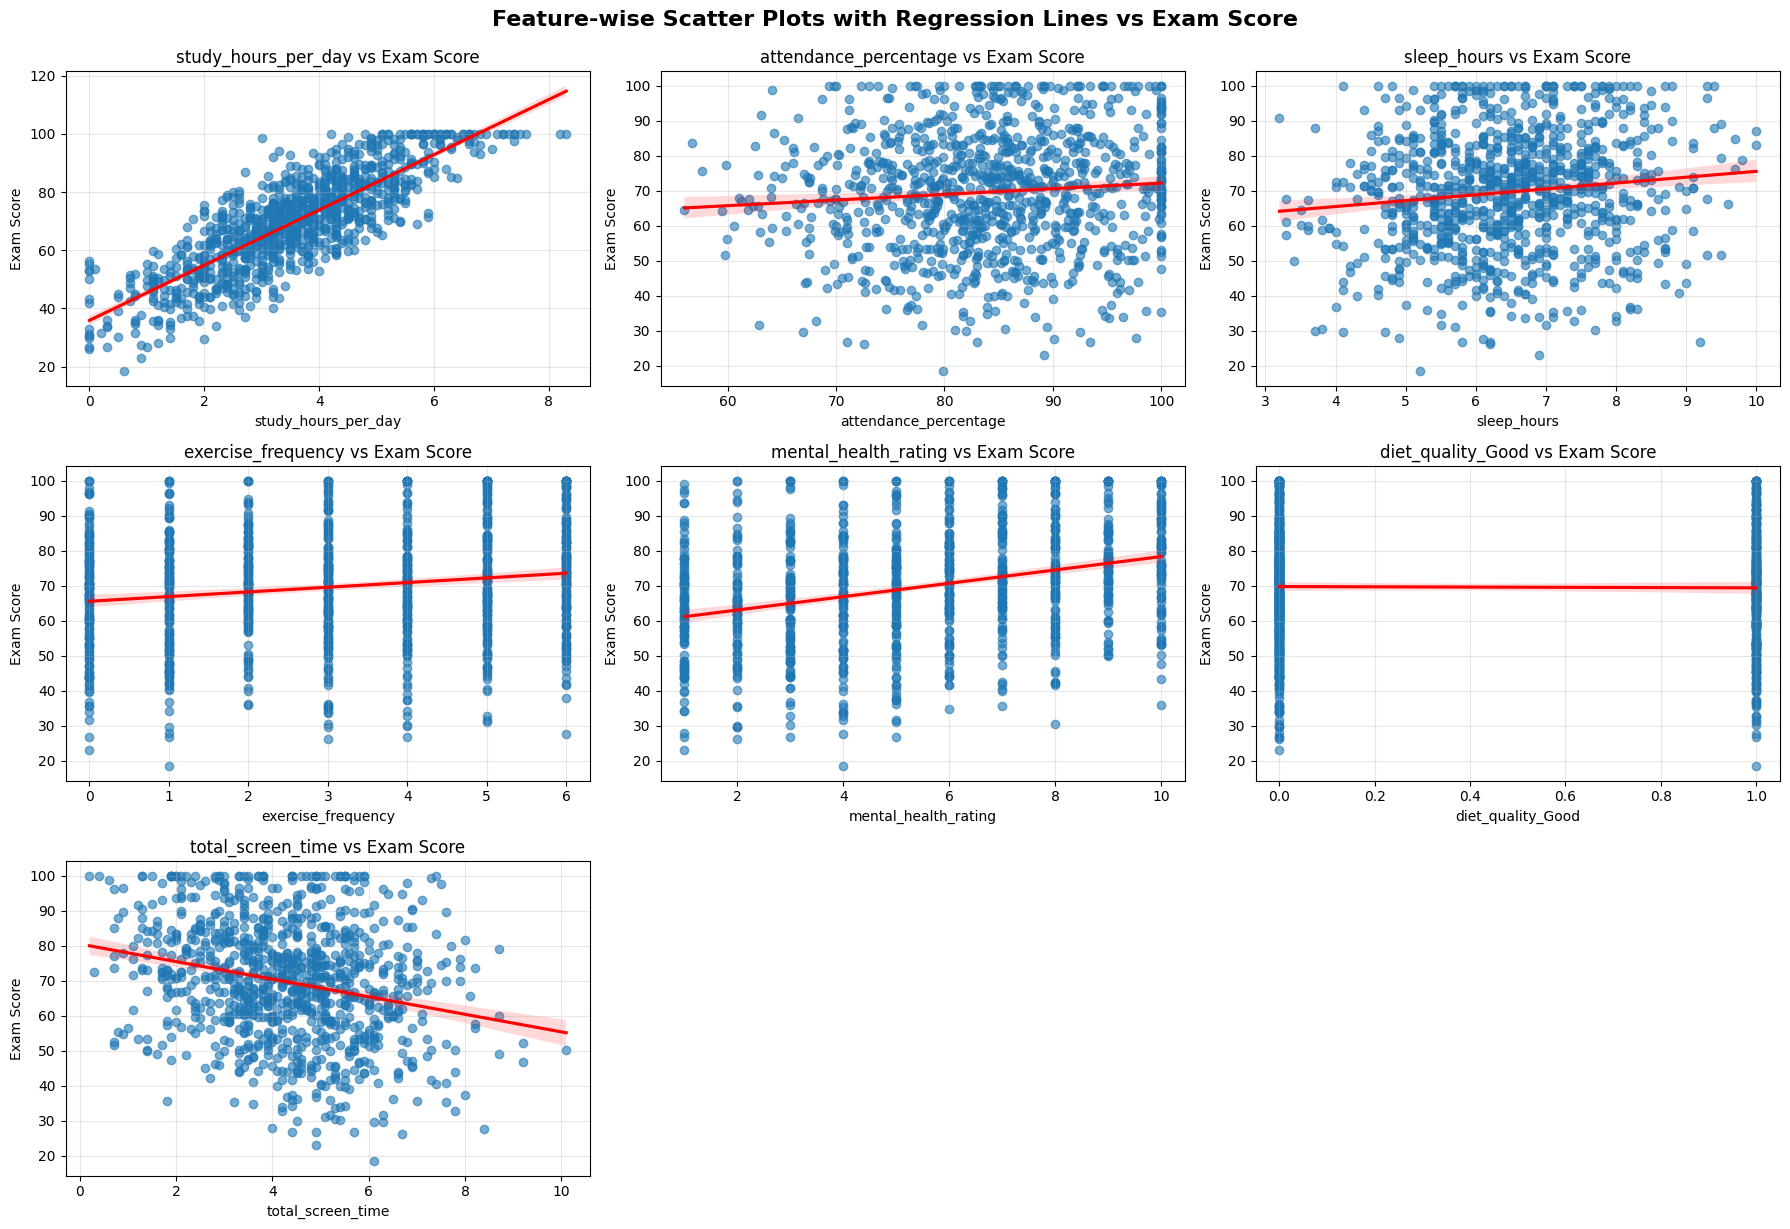

In [ ]:
# Add cluster labels to the original data
data['cluster'] = predict
# Calculate average exam score for each cluster
avg_scores = data.groupby('cluster')['exam_score'].mean().reset_index()
print("Average Exam Score per Cluster:")
print(avg_scores)
# Select features of interest for profiling
features_of_interest = [
    'study_hours_per_day', 'attendance_percentage', 'sleep_hours',
    'exercise_frequency', 'mental_health_rating', 'diet_quality_Good',
    'total_screen_time'
]

# Compute mean values of these features for each cluster
cluster_profiles = data.groupby('cluster')[features_of_interest].mean().round(2)
print("\nCluster Profiles (Mean Values):")
display(cluster_profiles)

# Plot setup
n_features = len(features_of_interest)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))
for i, feature in enumerate(features_of_interest, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(data=data, x=feature, y='exam_score', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs Exam Score")
    plt.xlabel(feature)
    plt.ylabel("Exam Score")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Feature-wise Scatter Plots with Regression Lines vs Exam Score", fontsize=16, fontweight='bold', y=1.02)
plt.show()

<ipython-input-89-2d73fcf174f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_scores, x='cluster', y='exam_score', palette='viridis')


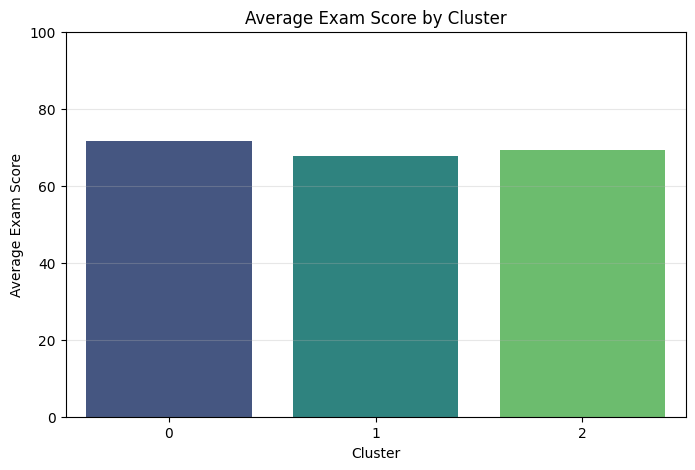

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = predict  # 'predict' from your KMeans output

# Compute average exam score per cluster
cluster_scores = data_with_clusters.groupby('cluster')['exam_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_scores, x='cluster', y='exam_score', palette='viridis')
plt.title('Average Exam Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Exam Score')
plt.ylim(0, 100)  # Assuming exam score is out of 100
plt.grid(axis='y', alpha=0.3)
plt.show()

## 5. Regression Analysis

Linear Regression

Mean Squared Error: 25.96
Mean Absolute Error (MAE): 4.15
R² Score: 0.90



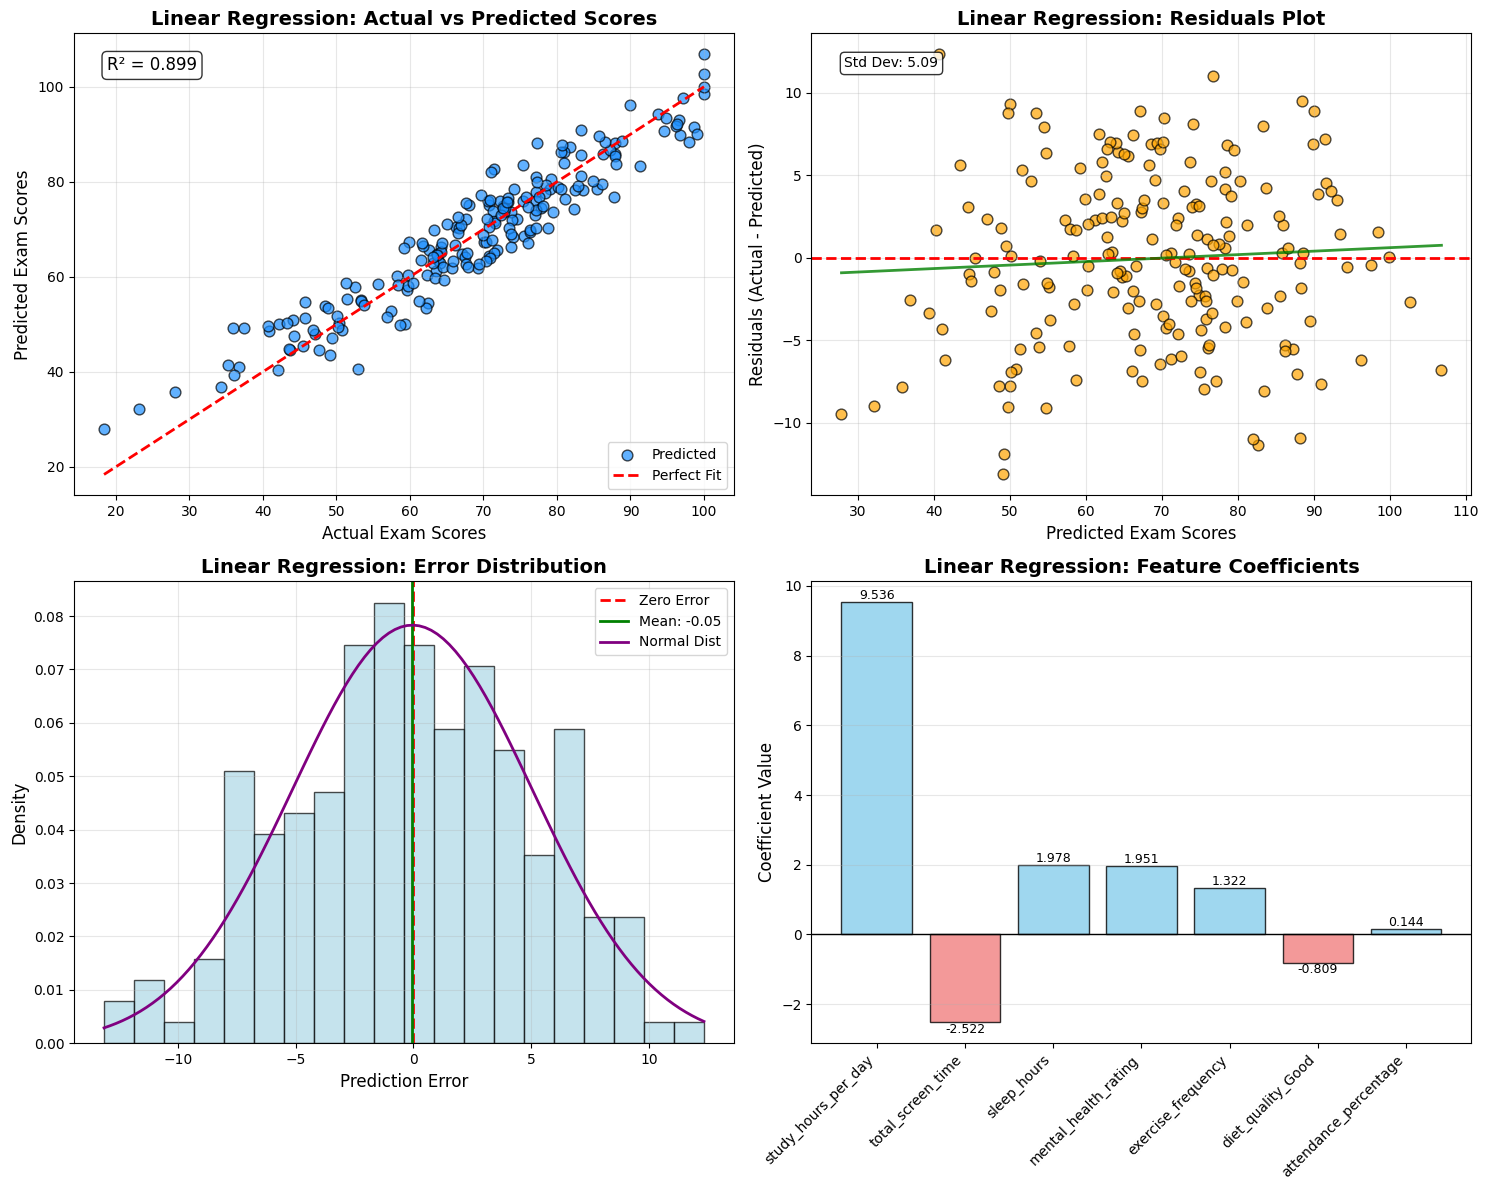

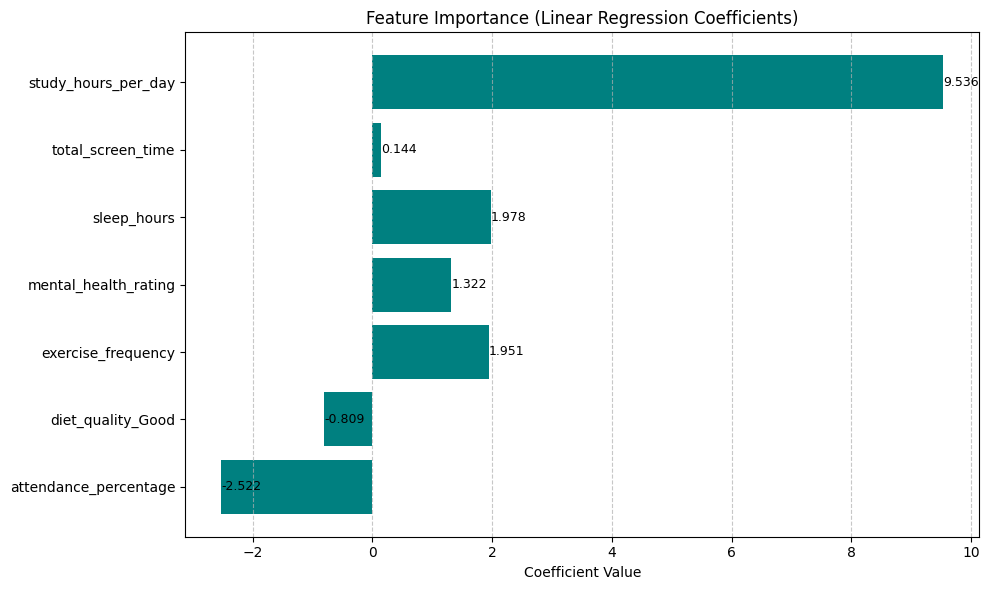

In [ ]:
features = data.drop('exam_score',axis=1).to_numpy()
labels = data['exam_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression\n")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}\n")

# Create comprehensive visualization with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original Actual vs Predicted (Enhanced)
ax1.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', edgecolor='k', label='Predicted', s=60)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Fit')

# Add R² annotation
ax1.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax1.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=12)

ax1.set_xlabel("Actual Exam Scores", fontsize=12)
ax1.set_ylabel("Predicted Exam Scores", fontsize=12)
ax1.set_title("Linear Regression: Actual vs Predicted Scores", fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals Plot
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.7, color='orange', edgecolor='k', s=60)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add trend line for residuals
z = np.polyfit(y_pred, residuals, 1)
p = np.poly1d(z)
ax2.plot(sorted(y_pred), p(sorted(y_pred)), color='green', linestyle='-', alpha=0.8, linewidth=2)

ax2.set_xlabel("Predicted Exam Scores", fontsize=12)
ax2.set_ylabel("Residuals (Actual - Predicted)", fontsize=12)
ax2.set_title("Linear Regression: Residuals Plot", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add residuals statistics
residual_std = np.std(residuals)
ax2.text(0.05, 0.95, f'Std Dev: {residual_std:.2f}', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)

# Plot 3: Error Distribution Histogram
ax3.hist(residuals, bins=20, alpha=0.7, color='lightblue', edgecolor='k', density=True)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax3.axvline(x=np.mean(residuals), color='green', linestyle='-', linewidth=2, label=f'Mean: {np.mean(residuals):.2f}')

# Add normal distribution overlay
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_dist = ((1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2))
ax3.plot(x, normal_dist, 'purple', linewidth=2, label='Normal Dist')

ax3.set_xlabel("Prediction Error", fontsize=12)
ax3.set_ylabel("Density", fontsize=12)
ax3.set_title("Linear Regression: Error Distribution", fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Model Coefficients (Feature Importance equivalent)
if hasattr(data, 'columns'):
    feature_names = data.drop('exam_score', axis=1).columns
    coefficients = model.coef_

    # Sort coefficients by absolute value
    abs_coef = np.abs(coefficients)
    indices = np.argsort(abs_coef)[::-1]

    colors = ['skyblue' if coef >= 0 else 'lightcoral' for coef in coefficients[indices]]
    bars = ax4.bar(range(len(coefficients)), coefficients[indices], color=colors, edgecolor='k', alpha=0.8)

    ax4.set_xticks(range(len(coefficients)))
    ax4.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
    ax4.set_title("Linear Regression: Feature Coefficients", fontsize=14, fontweight='bold')
    ax4.set_ylabel("Coefficient Value", fontsize=12)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.grid(True, axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, coef in zip(bars, coefficients[indices]):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.01),
                f'{coef:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=9)
else:
    # If no feature names, show coefficients by index
    coefficients = model.coef_
    abs_coef = np.abs(coefficients)
    indices = np.argsort(abs_coef)[::-1]

    colors = ['skyblue' if coef >= 0 else 'lightcoral' for coef in coefficients[indices]]
    bars = ax4.bar(range(len(coefficients)), coefficients[indices], color=colors, edgecolor='k', alpha=0.8)

    ax4.set_xlabel("Feature Index", fontsize=12)
    ax4.set_ylabel("Coefficient Value", fontsize=12)
    ax4.set_title("Linear Regression: Feature Coefficients", fontsize=14, fontweight='bold')
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance Plot using absolute coefficient values
if hasattr(data, 'columns'):
    feature_names = data.drop('exam_score', axis=1).columns
    coefficients = model.coef_
    abs_coefficients = np.abs(coefficients)

    # Sort features by importance
    sorted_indices = np.argsort(abs_coefficients)[::-1]
    sorted_features = feature_names[sorted_indices]
    sorted_coefficients = coefficients[sorted_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_features, sorted_coefficients[sorted_indices], color='teal')
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importance (Linear Regression Coefficients)')
    plt.gca().invert_yaxis()  # Most important at top
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Annotate values
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}',
                 va='center', ha='left', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("Feature names not available. Plotting with generic labels.")
    coefficients = model.coef_
    abs_coefficients = np.abs(coefficients)
    indices = np.argsort(abs_coefficients)[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh([f'Feature {i}' for i in indices], coefficients[indices], color='teal')
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importance (Linear Regression Coefficients)')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Decision Tree Regressor - Hyperparameter Tuning

Performing Grid Search...
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best cross-validation score: 0.7624

Decision Tree Regressor - Final Results

Mean Squared Error: 68.67
Mean Absolute Error (MAE): 6.50
R² Score: 0.73



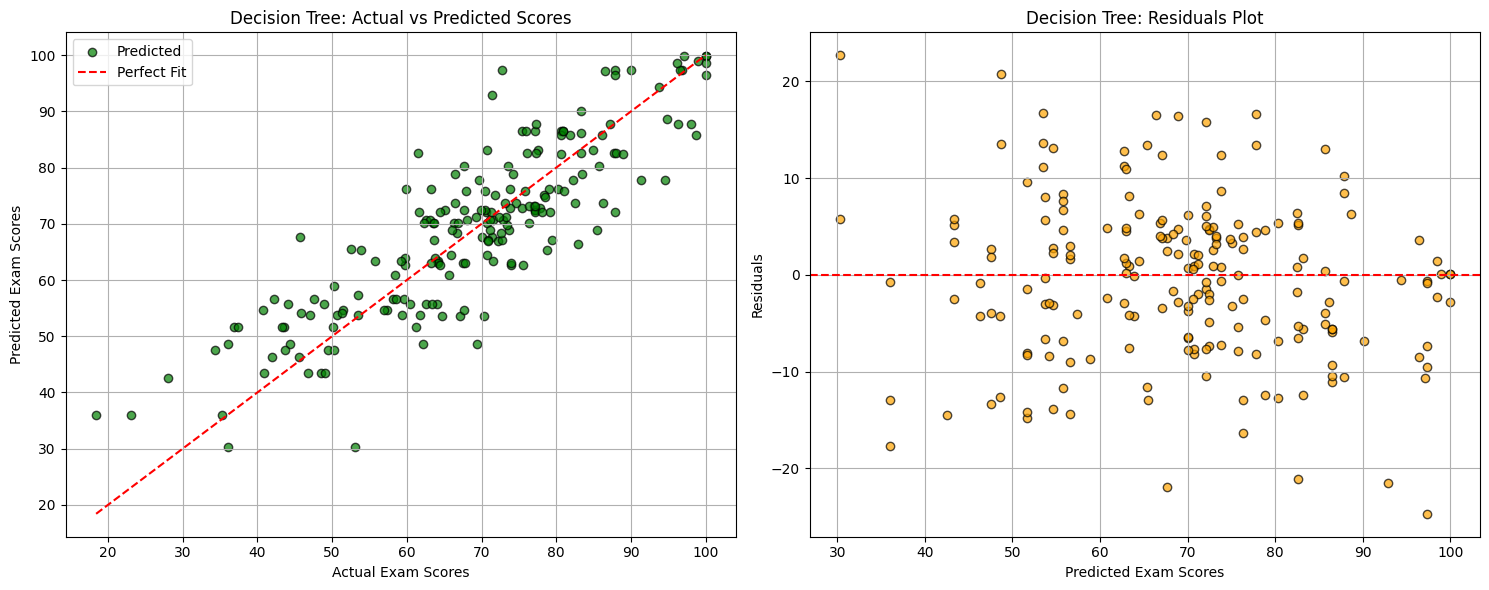

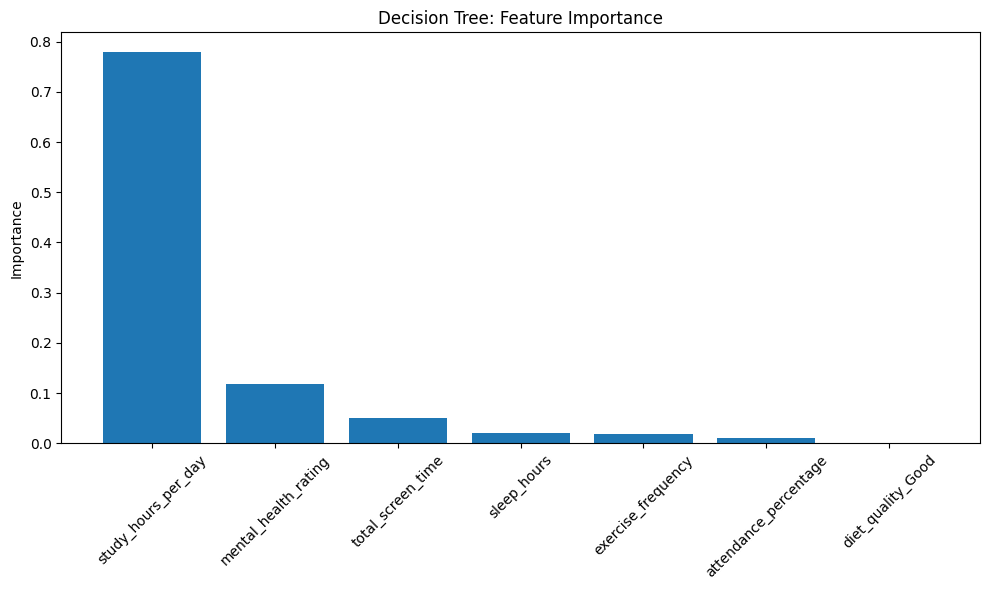

In [ ]:
# For Decision Tree Regressor, we'll perform hyperparameter tuning first
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=11)

# Perform Grid Search with Cross Validation
print("Decision Tree Regressor - Hyperparameter Tuning\n")
print("Performing Grid Search...")

grid_search_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# Fit the grid search
grid_search_dt.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f}\n")

# Make predictions with the best model
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor - Final Results\n")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}\n")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual vs Predicted
ax1.scatter(y_test, y_pred_dt, alpha=0.7, color='green', edgecolor='k', label='Predicted')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')
ax1.set_xlabel("Actual Exam Scores")
ax1.set_ylabel("Predicted Exam Scores")
ax1.set_title("Decision Tree: Actual vs Predicted Scores")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals plot
residuals_dt = y_test - y_pred_dt
ax2.scatter(y_pred_dt, residuals_dt, alpha=0.7, color='orange', edgecolor='k')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel("Predicted Exam Scores")
ax2.set_ylabel("Residuals")
ax2.set_title("Decision Tree: Residuals Plot")
ax2.grid(True)

plt.tight_layout()
plt.show()

# Feature importance visualization (if features have names)
if hasattr(data, 'columns'):
    feature_names = data.drop('exam_score', axis=1).columns
    importances = best_dt_model.feature_importances_

    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]

    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.title("Decision Tree: Feature Importance")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

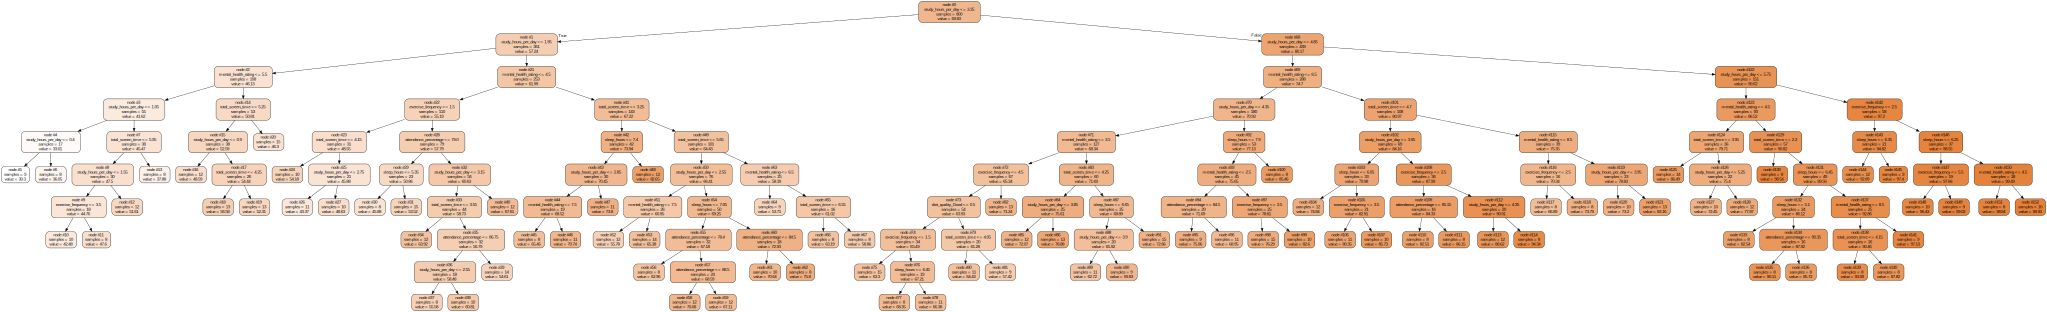

In [ ]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Visualize the best Decision Tree Regressor
try:
    feature_names = data.drop('exam_score', axis=1).columns.tolist()
except NameError:
    # If data is not defined or processed in the current scope, define feature names manually
    # based on the dataset structure after preprocessing as seen in the previous cell.
    # This is a fallback and might need adjustment if the preprocessing changes.
    feature_names = [
        'study_hours_per_day', 'attendance_percentage', 'exercise_frequency',
        'sleep_hours', 'mental_health_rating', 'diet_quality_Good',
        'total_screen_time'
    ]


# Export the tree to a DOT file
dot_data = export_graphviz(best_dt_model,
                           feature_names=feature_names,
                           filled=True,
                           rounded=True,
                           impurity=False,
                           node_ids=True, # Optional: Include node IDs
                           proportion=False, # Optional: Show sample count instead of percentage
                           precision=2) # Optional: Number of decimal places for thresholds

# Render the DOT file to a PNG or view directly
graph = graphviz.Source(dot_data)
display(graph)

# You can also save the graph to a file
# graph.render("decision_tree", view=True) # Saves as decision_tree.gv.pdf and opens it


Random Forest Regressor - Hyperparameter Tuning

Performing Grid Search (this may take a few minutes)...
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8620

Random Forest Regressor - Final Results

Mean Squared Error: 34.75
Mean Absolute Error (MAE): 4.73
R² Score: 0.86



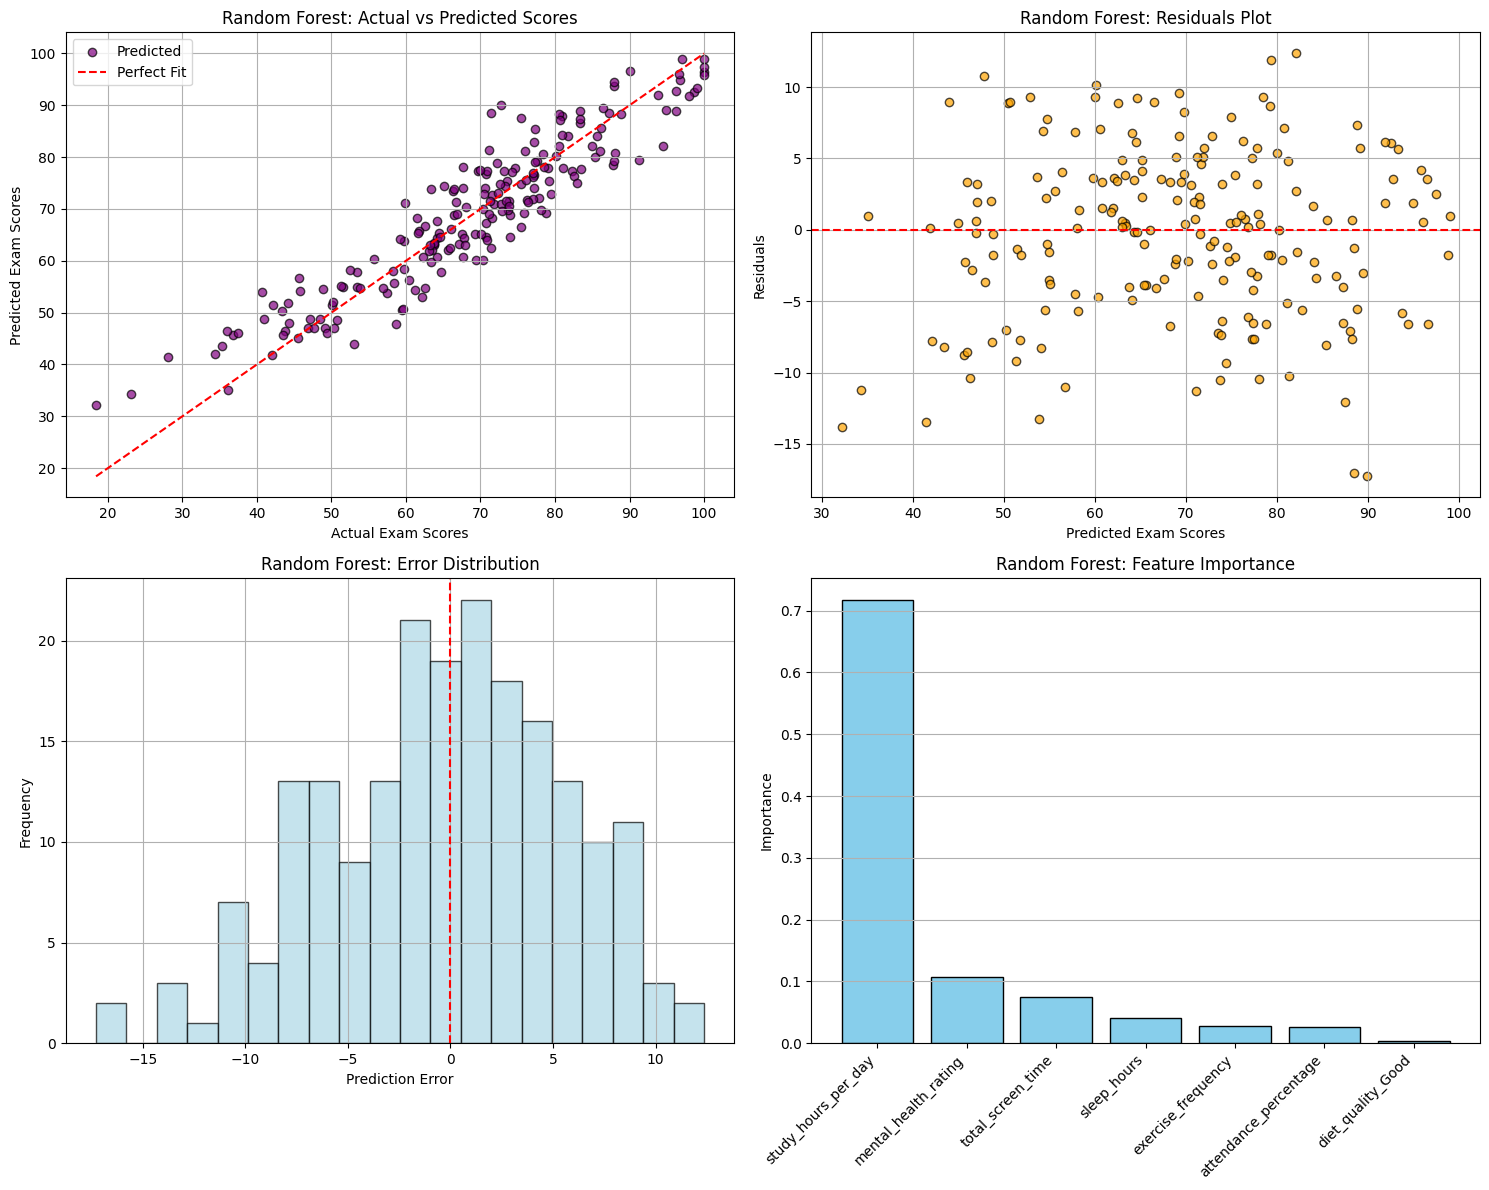

Feature Importance Rankings:
1. study_hours_per_day: 0.7168
2. mental_health_rating: 0.1078
3. total_screen_time: 0.0748
4. sleep_hours: 0.0416
5. exercise_frequency: 0.0282
6. attendance_percentage: 0.0267
7. diet_quality_Good: 0.0041


In [ ]:
# For Random Forest Model, we'll also be including hyperparameter tuning first


# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=11)

# Perform Grid Search with Cross Validation
print("Random Forest Regressor - Hyperparameter Tuning\n")
print("Performing Grid Search (this may take a few minutes)...")

grid_search_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}\n")

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Final Results\n")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}\n")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted
ax1.scatter(y_test, y_pred_rf, alpha=0.7, color='purple', edgecolor='k', label='Predicted')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')
ax1.set_xlabel("Actual Exam Scores")
ax1.set_ylabel("Predicted Exam Scores")
ax1.set_title("Random Forest: Actual vs Predicted Scores")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals plot
residuals_rf = y_test - y_pred_rf
ax2.scatter(y_pred_rf, residuals_rf, alpha=0.7, color='orange', edgecolor='k')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel("Predicted Exam Scores")
ax2.set_ylabel("Residuals")
ax2.set_title("Random Forest: Residuals Plot")
ax2.grid(True)

# Plot 3: Prediction Error Distribution
ax3.hist(residuals_rf, bins=20, alpha=0.7, color='lightblue', edgecolor='k')
ax3.set_xlabel("Prediction Error")
ax3.set_ylabel("Frequency")
ax3.set_title("Random Forest: Error Distribution")
ax3.axvline(x=0, color='red', linestyle='--')
ax3.grid(True)

# Plot 4: Feature Importance (if feature names are available)
if hasattr(data, 'columns'):
    feature_names = data.drop('exam_score', axis=1).columns
    importances = best_rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    ax4.bar(range(len(importances)), importances[indices], color='skyblue', edgecolor='k')
    ax4.set_xticks(range(len(importances)))
    ax4.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
    ax4.set_title("Random Forest: Feature Importance")
    ax4.set_ylabel("Importance")
    ax4.grid(True, axis='y')
else:
    # If no feature names, show a simple feature importance plot
    importances = best_rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    ax4.bar(range(len(importances)), importances[indices], color='skyblue', edgecolor='k')
    ax4.set_xlabel("Feature Index")
    ax4.set_ylabel("Importance")
    ax4.set_title("Random Forest: Feature Importance")
    ax4.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Print feature importance rankings
print("Feature Importance Rankings:")
if hasattr(data, 'columns'):
    feature_names = data.drop('exam_score', axis=1).columns
    importances = best_rf_model.feature_importances_
    feature_importance_df = list(zip(feature_names, importances))
    feature_importance_df.sort(key=lambda x: x[1], reverse=True)

    for i, (feature, importance) in enumerate(feature_importance_df, 1):
        print(f"{i}. {feature}: {importance:.4f}")
else:
    importances = best_rf_model.feature_importances_
    for i, importance in enumerate(sorted(importances, reverse=True), 1):
        print(f"{i}. Feature {np.where(importances == importance)[0][0]}: {importance:.4f}")

# Out-of-bag score (if available)
if hasattr(best_rf_model, 'oob_score_') and best_rf_model.oob_score_:
    print(f"\nOut-of-bag Score: {best_rf_model.oob_score_:.4f}")

## 6. Optional Classification Task

In [ ]:

# Convert 'exam_scores' into performance levels
quantiles = data['exam_score'].quantile([0.33, 0.67])

def categorize_performance(score):
  if score <= quantiles[0.33]:
    return 'Low'
  elif score <= quantiles[0.67]:
    return 'Average'
  else:
    return 'High'
categorize_performance
data['performance'] = data['exam_score'].apply()

# Display the head of the dataframe with the new column
display(data.head())

X_classification = data.drop(['exam_score', 'performance'], axis=1)
y_classification = data['performance']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=11
)

# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_classification)
y_test_enc = le.transform(y_test_classification)

# Get the class names (in the same order as encoded labels)
class_names = le.classes_

study_hours_per_day  attendance_percentage  sleep_hours  \
0                  0.0                   85.0          8.0   
1                  6.9                   97.3          4.6   
2                  1.4                   94.8          8.0   
3                  1.0                   71.0          9.2   
4                  5.0                   90.9          4.9   

   exercise_frequency  mental_health_rating  exam_score  diet_quality_Good  \
0                   6                     8        56.2                0.0   
1                   6                     8       100.0                1.0   
2                   1                     1        34.3                0.0   
3                   4                     1        26.8                0.0   
4                   3                     1        66.4                0.0   

   total_screen_time performance  
0                2.3         Low  
1                5.1        High  
2                4.4         Low  
3                4.9         Low  
4                4.9     Average

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy: 0.73

Classification Report:


precision  recall  f1-score  support
Average            0.70    0.60      0.64    77.00
High               0.64    0.79      0.70    47.00
Low                0.84    0.84      0.84    76.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.73    0.74      0.73   200.00
weighted avg       0.74    0.74      0.73   200.00

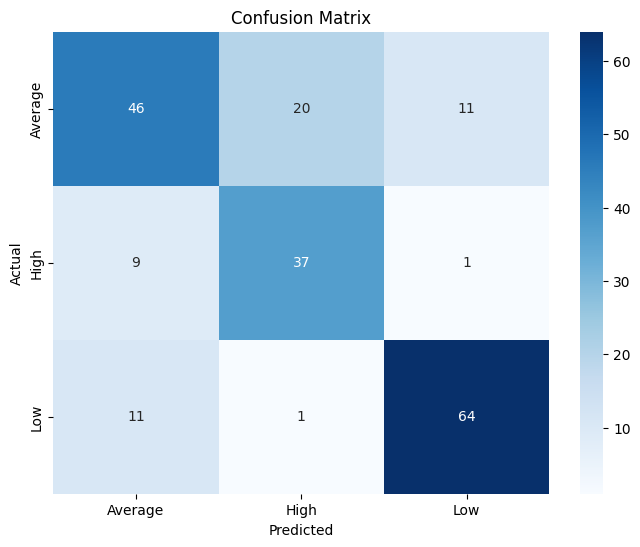

In [ ]:
# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
dt = DecisionTreeClassifier(random_state=11)

# GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_classification, y_train_enc)

# Best model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
predict_enc = best_dt.predict(X_test_classification)

# Accuracy
accuracy = accuracy_score(y_test_enc, predict_enc)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report (with label names)
report_dict = classification_report(y_test_enc, predict_enc, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_df)

# Confusion Matrix
confusion_m = confusion_matrix(y_test_enc, predict_enc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.83

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision  recall  f1-score  support
Average            0.80    0.74      0.77    77.00
High               0.79    0.94      0.85    47.00
Low                0.89    0.86      0.87    76.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.83    0.84      0.83   200.00
weighted avg       0.83    0.83      0.83   200.00

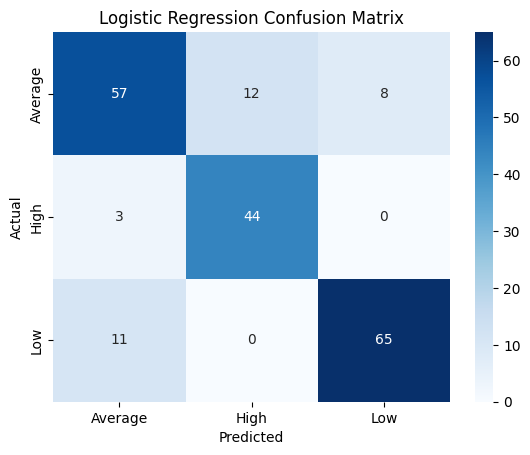

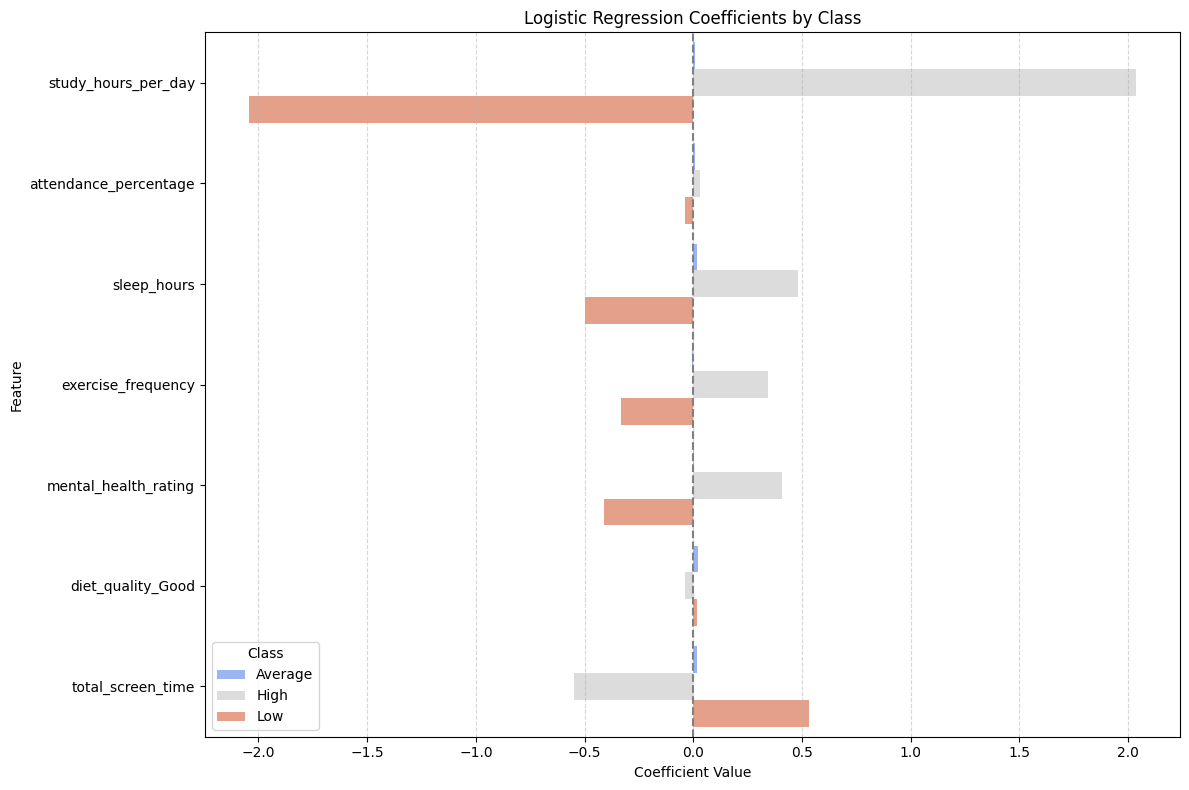

In [ ]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

logistic = LogisticRegression(random_state=11, max_iter=1000)
grid_lr = GridSearchCV(logistic, param_grid_lr, cv=5)
grid_lr.fit(X_train_classification, y_train_enc)

predict_lr = grid_lr.predict(X_test_classification)
print("Best Parameters:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test_enc, predict_lr))

report_dict = classification_report(y_test_enc, predict_lr, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_df)

confusion_m = confusion_matrix(y_test_enc, predict_lr)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Get feature names
if hasattr(X_train_classification, 'columns'):
    feature_names = X_train_classification.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_train_classification.shape[1])]

# Extract the best model and its coefficients
best_lr = grid_lr.best_estimator_
coefficients = best_lr.coef_  # shape: (n_classes, n_features)

# Create a DataFrame for coefficients per class
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=class_names)
coef_df = coef_df.reset_index().melt(id_vars='index', var_name='Class', value_name='Coefficient')
coef_df.rename(columns={'index': 'Feature'}, inplace=True)

# Plot the raw coefficients
plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Class', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Logistic Regression Coefficients by Class")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.legend(title="Class")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.775

Classification Report:


precision  recall  f1-score  support
Average            0.72    0.69      0.70    77.00
High               0.75    0.94      0.83    47.00
Low                0.87    0.76      0.81    76.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.78    0.80      0.78   200.00
weighted avg       0.78    0.78      0.77   200.00

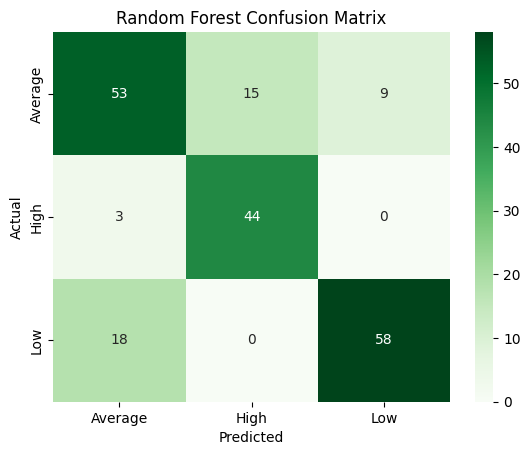

In [ ]:
#Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

rf = RandomForestClassifier(random_state=11)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train_classification, y_train_enc)

predict_rf = grid_rf.predict(X_test_classification)
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test_enc, predict_rf))

report_dict = classification_report(y_test_enc, predict_rf, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_df)

confusion_m = confusion_matrix(y_test_enc, predict_rf)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best Parameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.825

Classification Report:


precision  recall  f1-score  support
Average            0.78    0.75      0.77    77.00
High               0.79    0.89      0.84    47.00
Low                0.89    0.86      0.87    76.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.82    0.83      0.83   200.00
weighted avg       0.83    0.82      0.82   200.00

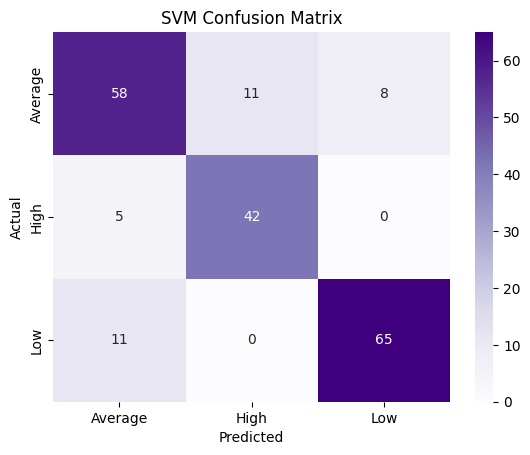

In [ ]:
#Support Vector Machine
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train_classification, y_train_enc)

predict_svm = grid_svm.predict(X_test_classification)
print("Best Parameters:", grid_svm.best_params_)
print("Accuracy:", accuracy_score(y_test_enc, predict_svm))

report_dict = classification_report(y_test_enc, predict_svm, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_df)

confusion_m = confusion_matrix(y_test_enc, predict_svm)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.605

Classification Report:


precision  recall  f1-score  support
Average            0.51    0.62      0.56     77.0
High               0.59    0.62      0.60     47.0
Low                0.77    0.58      0.66     76.0
accuracy           0.60    0.60      0.60      0.6
macro avg          0.62    0.61      0.61    200.0
weighted avg       0.63    0.60      0.61    200.0

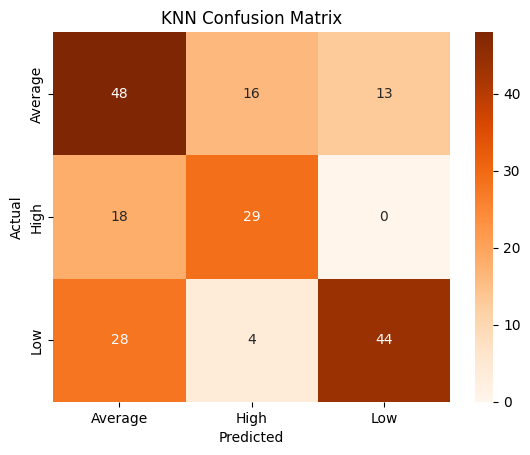

In [ ]:
# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train_classification, y_train_enc)

predict_knn = grid_knn.predict(X_test_classification)
print("Best Parameters:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test_enc, predict_knn))

report_dict = classification_report(y_test_enc, predict_knn, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
print("\nClassification Report:")
display(report_df)

confusion_m = confusion_matrix(y_test_enc, predict_knn)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# IV. Interpretation and Insights

This section summarizes key findings, model evaluations, and real-world implications based on the analysis.

---

## A. Feature Importance

### Tree-Based Models (e.g., Decision Tree, Random Forest)

#### Decision Tree
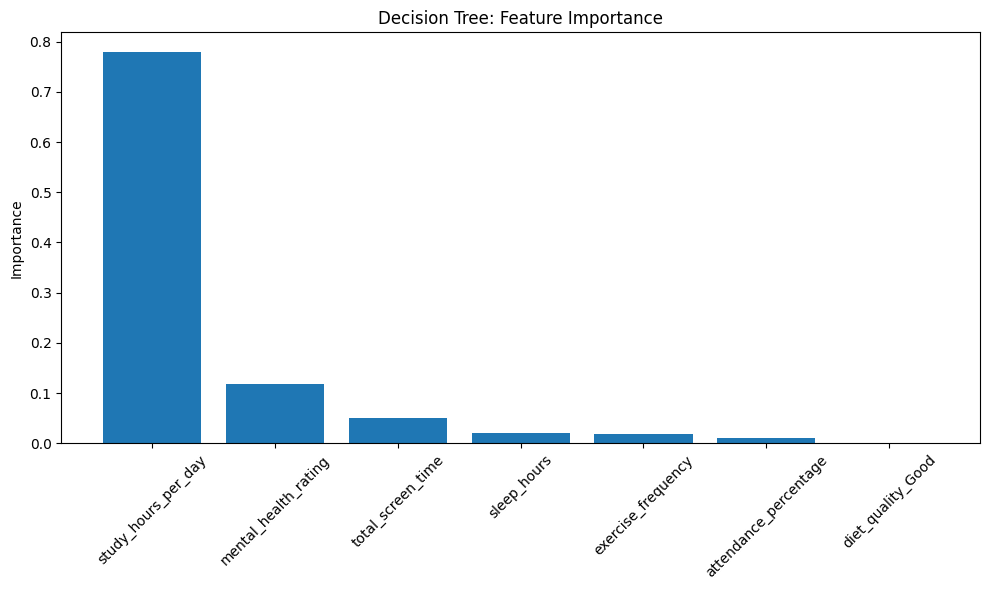
In the decision tree model, the graph above shows the most important features. `study_hours_per_day` impacts the prediction the most compared with other features. The next four features are all trailing behind: `mental_health_rating`, `total_screen_time`, `sleep_hours`, and `exercise_frequency`. It is also worth noting that `diet_quality_Good` showed zero effect on the predictions, thereby implying that it is not a necessary requirement for achieving exceptional exam scores.

#### Random Forest Classifier

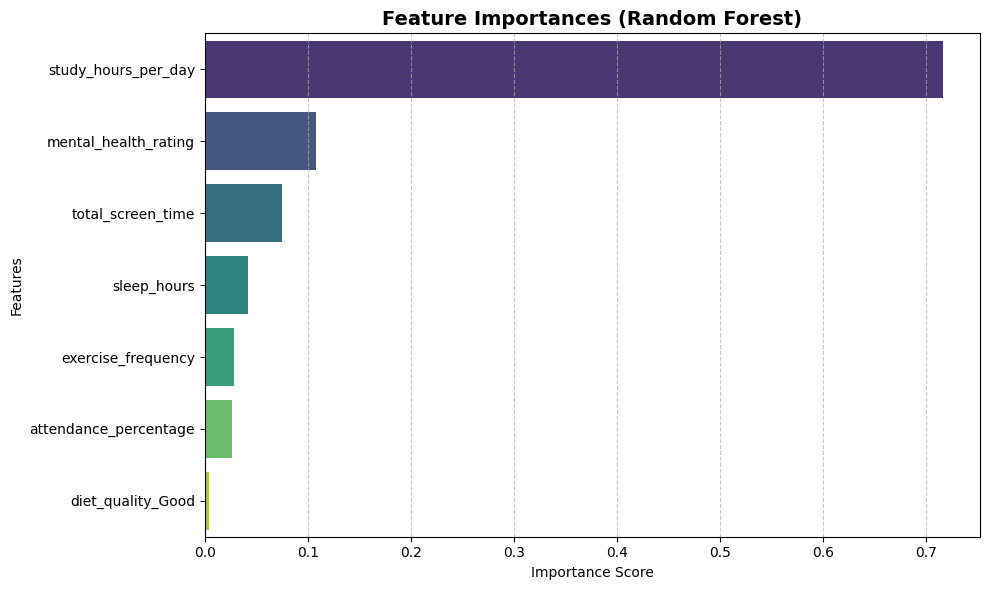

The best performing Random Forest model has 200 estimators. This is enough for it to score 0.86 on R-squared. Once again, the same features that were ranked in the Decision Tree Classifier are still the same features that were ranked here in Random Forest. Even the scores are almost the same for both models, although Random Forest also acknowledges the positive contribution (still insignificant) of `diet_quality_Good`.

### Linear Models (e.g., Logistic or Linear Regression)

#### Linear Regression
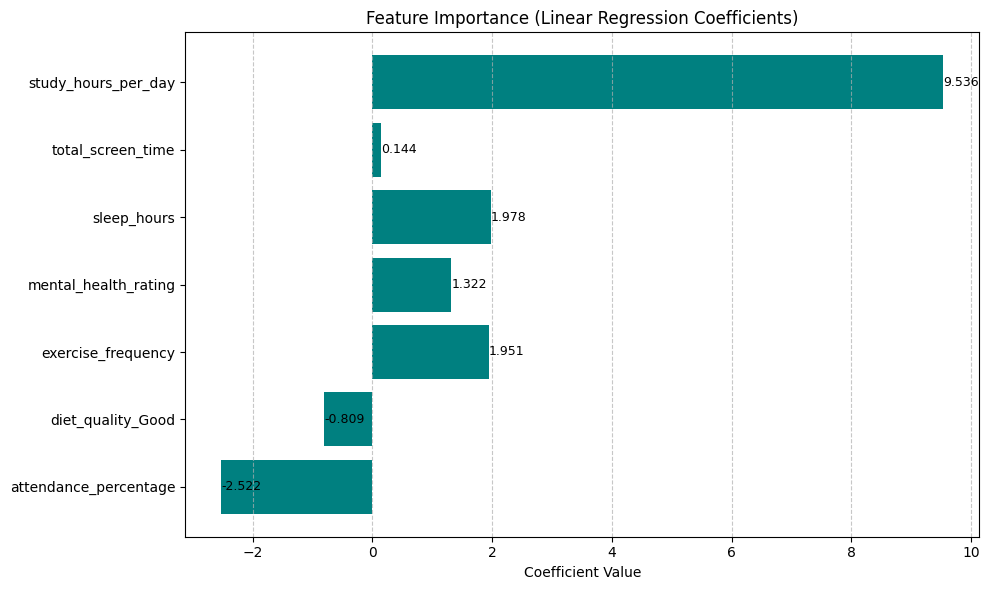

The graph above shows the coefficients of the features used by the linear regression model. This also demonstrates the importance of the features, and once again the `study_hours_per_day` dominates with a coefficient of 9.536. On the other hand, the `attendance_percentage` has the highest negative coefficient, showing that the students' attendance impedes their exam scores the most. Moreover, despite being a negative activity, the `total_screen_time` shows the lowest signficance in the model. This is especially insightful because of all the regression models that were trained, the linear regression model has the highest R-squared score and the lowest Mean Squared Error and Mean Absolute Error.

#### Logistic Regression
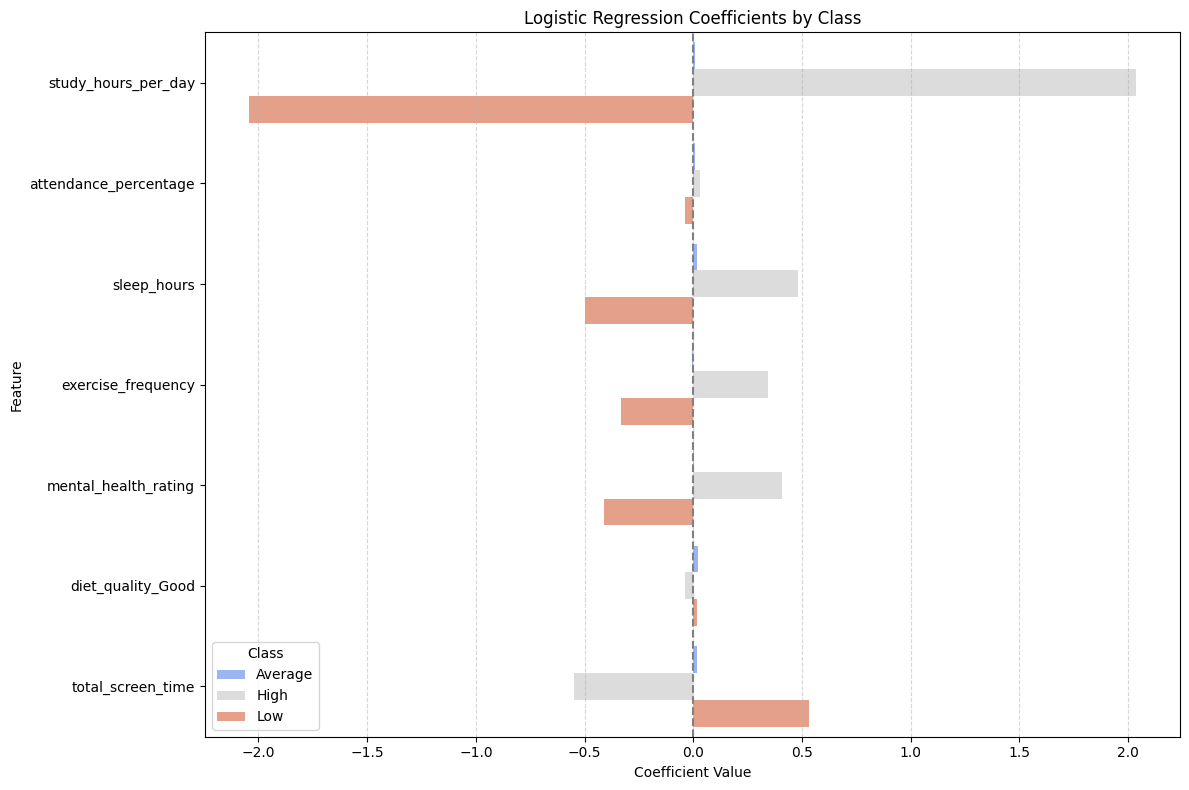

Since the Logistic Regression was trained on classification of th exam scores (Low, Average, High), the presentation of the feature importance are different. However, it is clear that for High and Low scoring students, the `study_hours_per_day` still impact their performance positively, while `total_screen_time` affect it the most negatively. Following after these are `sleep_hours`, `mental_health_rating`, and `exercise frequency`. `attendance_percentage` and `diet_quality` does not appear to impact the model signficantly. It is also worth noting that due to the little presence of average scores, the coefficients all appear insignificant to average scoring students.

### 🏆 Top 3–5 Influential Features
The following features affect the model performance the most:
1. `study_hours_per_day` (positive)
2. `total_screen_time` (negative)
3. `sleep_hours` (positive)
4. `mental_health_rating` (positive)
5. `exercise_frequency` (positive)
---

### 📌 Cluster Behavior Summary
## B. 🧩 Cluster Profiling

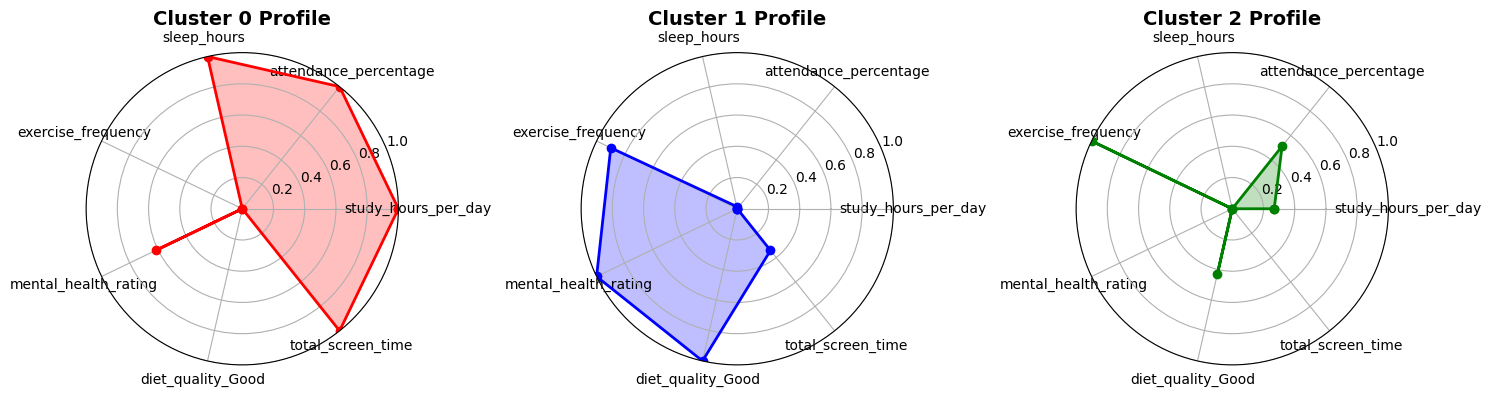

The radar chart below shows the profiling of each cluster based on their behaviors.

**Cluster 0 - The nerds**
1. high amount of study hours
2. most attendance in classes
3. Regular sleep hours
4. High total screen time
5. Sedentary lifestyle (low exercise and poor diet)

**Cluster 1 - The "health is wealth" group**
1. High mental health rating
2. Good quality diet
3. Regular exercise

**Cluster 2 - The outliers**
1. Low study hours
2. Low attendance in classes
3. Varying exercise frequency and mental health rating.


### 📊 Exam Score Comparison
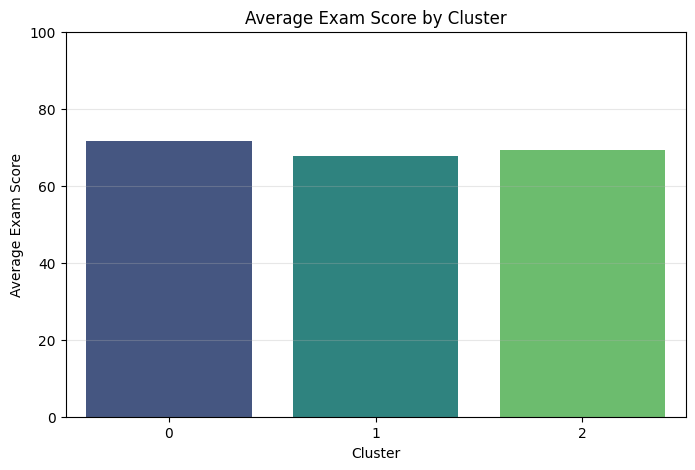

The plot above shows the average exam scores by each cluster. Notice how the average scores are relatively close to each other. It still shows that the first cluster scores better than the other two clusters, but comparing the behaviors of this cluster versus the other cluster, it should have been expected to perform significantly better versus the other cluster. We can also see here that the "Outliers" group performed better than the "Health is Wealth" group.

### 📈 Trend Analysis
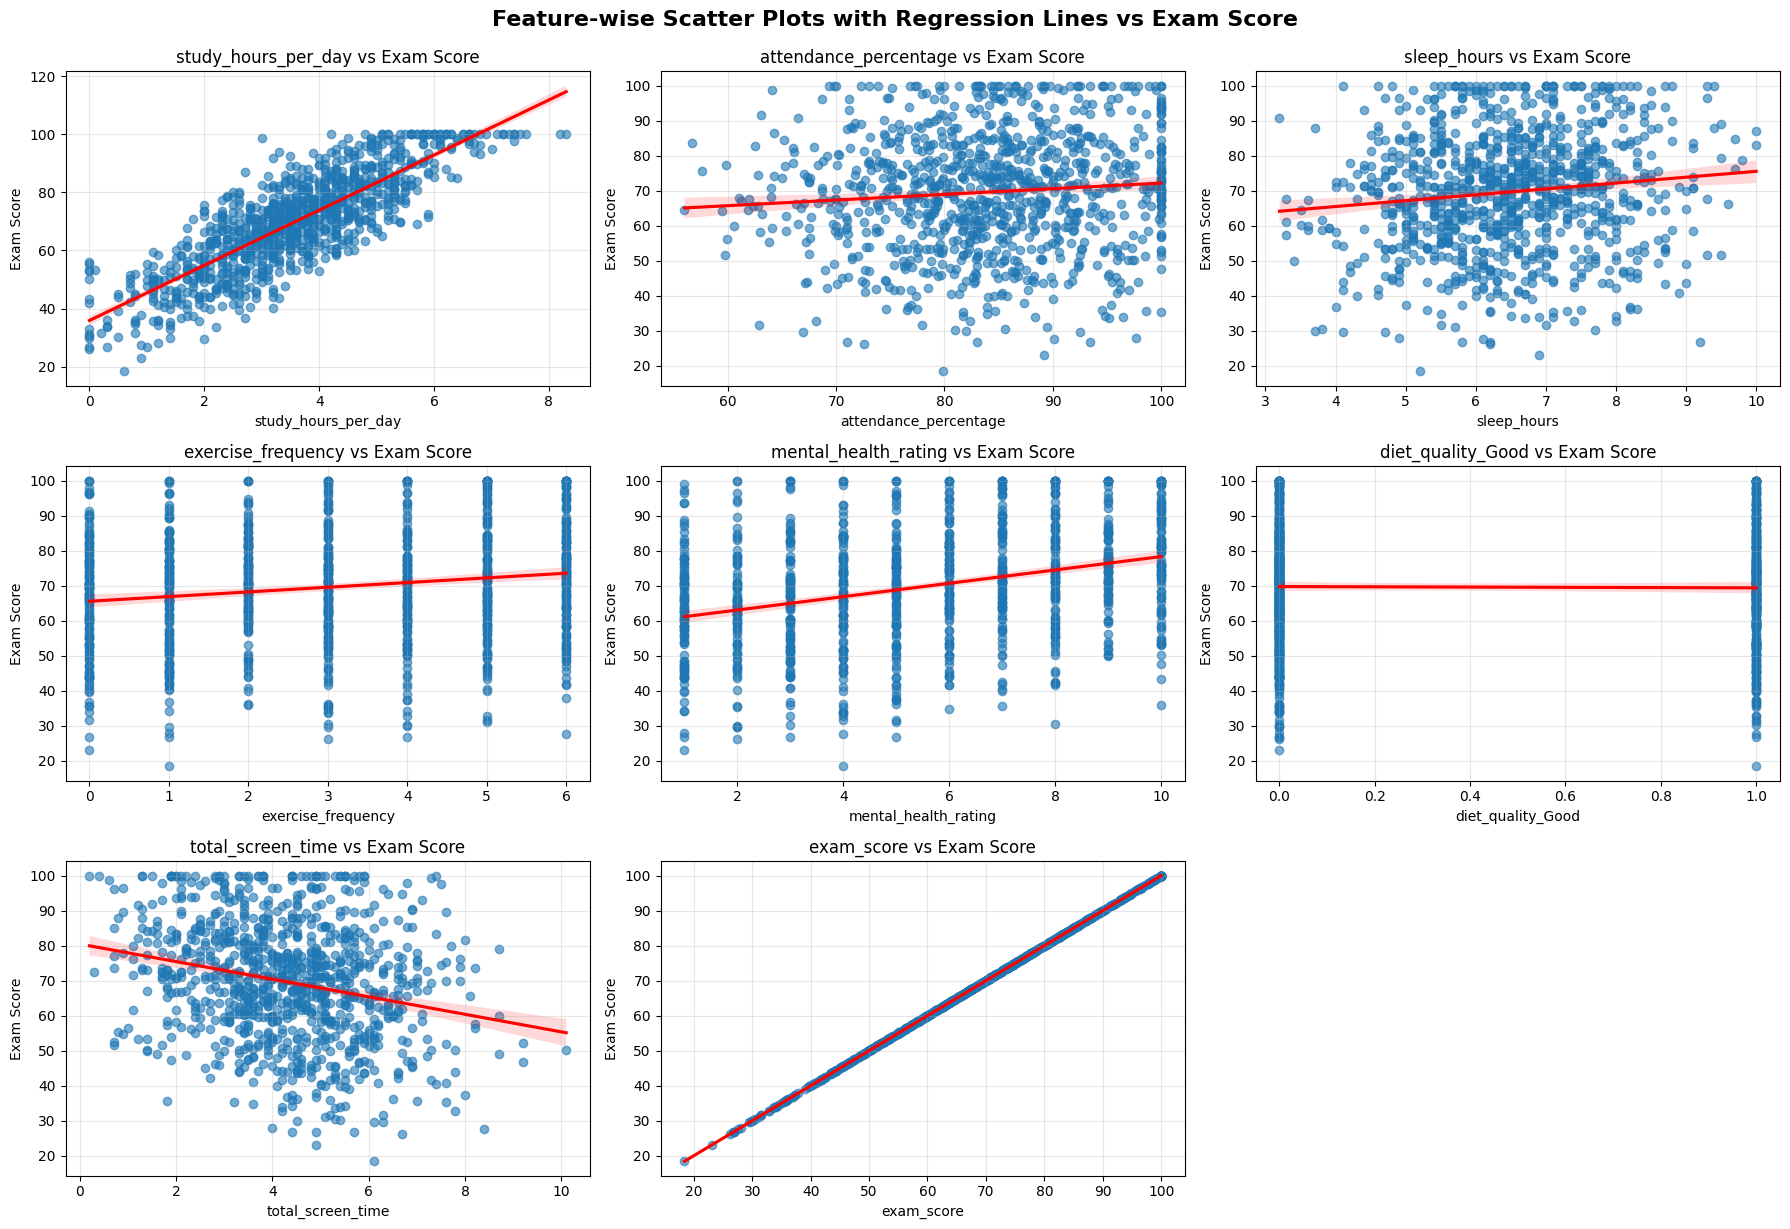

The plots above show the trend of each features in comparison with the exam scores. Notice that the `study_hours_per_day` shows the highest positive correlation with the exam score, followed by `sleep_hours` and `mental_health_rating`, showing that the trend is consistent with the results of the models taht were previously analyzed. The `total_screen_time` is the most negatively correlated variable, demonstrating the need for students to get off their phones in order to focus on their growth and performance.

---

## C. 🧪 Model Performance

### 🥇 Best Performing Model

#### Linear Regression
When it comes to regression type of tasks, Linear Regression performs the best. It scored the lowest Mean Squared Error and Mean Absolute Error, while scoring highest on R-squared score at 0.90. The runner up based on R-squared score is Random Forest Regressor with 0.86.

### Logistic Regression
When it comes to classification, the Logistic Regression performed better in terms of Accuracy versus the other models at 0.83, followed closely by the Support Vector Classifier at 0.82. Both models also outperformed in terms of F1-score, recall, and precision. For example, Logistic Regression for the "Low" scores has a precision of 89%, a recall of 86%, and an overall F1-Score of 0.87.

### ⚖️ Trade-Offs

While **SVC** and **Logistic Regression** result in higher accuracies, their results are harder to explain compared to tree-based models like DecisionTree. It is best to present two models: one that will demonstrate the way machine learning models make inference (interpretability), and the best model that shows the excellence of these algorithms to see trends in data.

---

## D. 🌐 Real-World Implications

### 🎓 Student Advice
- Put incredible amount of time in your study, while still having regular sleep hours and schedule. Both of these factors have been shown to positively correlated with exam performance.
- Do not neglect being present in class and keep your total screen time to a minimum in order to focus.
- Never forget to still look out for your body since exercise quality has been significant in exam performance.
- While diet quality is not linked with exam scores, it is in general linked with better mental health and focus so always still eat healthy and balanced diets.

### 🤔 Surprising Findings

- Diet qulity have surprisingly little effect with exam scores despite the benefits they bring to you.
- Despite the complex nature of other machine learning models, the simple Linear Regression and Logistic Regression have both outperformed them in their respective tasks.